<a href="https://colab.research.google.com/github/opieeipo/AppliedAI/blob/main/bcg_powerco_case_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Descriptive Analytics**

#Data Preparation
##Load the Data for Client and Price

> First we load the necessary libraries, pandas, numpy, datetime, scikit-learn



In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as cat
from sklearn.preprocessing import LabelEncoder

#define the Google Drive Paths to the datasets
client_data_csv="https://drive.google.com/uc?export=download&id=1LV1SljPvIV-i3e4Zr0K5F7Z8LXm_VxKv"
ml_case_test_data_csv="https://drive.google.com/uc?export=download&id=1pG_pSBiOuiWI9bcv0yC38wgj3rtQnMY2"
ml_case_test_output_template_csv="https://drive.google.com/uc?export=download&id=1lkxO3b5y6LGMJz_ngVfxTLYqET9grdoQ"
price_data_csv="https://drive.google.com/uc?export=download&id=1WfLL1g11nEedq5JPyEBYI9f_QVl8YBaU"

# Load the client dataset
try:
  client = pd.read_csv(client_data_csv,
                       sep=',',         # Change if delimiter is not comma (e.g., ';', '\t')
                       encoding='utf-8', # Change if file is not UTF-8 (e.g., 'latin1', 'iso-8859-1')
                       header=0,        # Set to None if no header, or specific row number if different
                       skiprows=0       # Number of rows to skip from the beginning
                       )
  print(client.head())
  client.head(5)
  # Let's load price dataset

  price = pd.read_csv(price_data_csv)
  price.head(5)

except pd.errors.ParserError as e:
    print(f"Still getting a ParserError: {e}")
    print("This often means the data format in the CSV is inconsistent.")
    print("Carefully inspect your CSV file in a text editor for malformed lines.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


                                 id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t

##Basic Information About Client Data
>This command lets us know more about the basic structure of the dataset "client". For example it will tell us what type of data it is, object, integer(int64), float (float64), etc.  object is a complex data type that isn't just a number or text, but parts of a more complex idea.

>For instance a car has tires, engine, body, seats, etc.  So a car for example would be an object that contains tires,engine,body, and seats.  

In [ ]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

##Date Type Fields Found
Let's tell python they are date fields.

>Originally, in the last step, python only picked out that it was an "object" in this case a string, but we know they are date fields, so we need to help python out by telling it that so it can let us do more with it in later steps.  

>

```
# This is formatted as code
```

Date fields are notoriously difficult to program with because of they can be represented so many different ways

In [ ]:
# Out of total 25 features, 4 features are related to date. So, for easy understanding let's convert into datetime datatype

for f in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    client[f] = pd.to_datetime(client[f])


##Extrapolate New Data

>Because we defined certain fields as a date field in the last step, we now can tell it to create new fields/variables.  In this instance we want to get the year for the start and end of the contract for a client for later analysis

In [ ]:
# let's add some new features
client['contract_start_year']= client['date_activ'].dt.year
client['contract_end_year']= client['date_end'].dt.year


##Clean the Data

>Data is rarely clean, and so it's helpful to get rid of duplicates and or null values from the data as we probably don't care about that for the summary analysis we're doing.

In [ ]:
#Let's check presence of null and duplicate values
print(client.isnull().sum())



id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_start_year               0
contract_end_year           

##Showing The Sum of Duplicate Data

>In this example it doesn't really check for duplicates, it just points out the result. In a real world model, we'd probably want to take this opportunity to do a check and then determine if we want to go forward with further checks.  But we've shortcutted a little to reduce complexity.

In [ ]:
print(client.duplicated().sum())

0


##Make a Helper Function For Categories

>This code defines a Python function called describe_categorical that takes a dataset (presumably a pandas DataFrame) as input. Its purpose is to analyze and display information about the categorical columns within that dataset.

Here's a breakdown of what the function does:

1. **Identifies Categorical Columns:** It first finds columns with the data type 'object' (which often represent categorical data in pandas) and stores their names in a list called cat_columns.
2. **Checks for Categorical Columns:** It checks if there are any categorical columns found.
3. **Analyzes and Prints Information** (if categorical columns exist):

* If categorical columns are found, it prints a message listing them.

* It then iterates through each categorical column:

  * For each column, it calculates the frequency of each unique value and their proportion relative to the total number of rows in the dataset.
  * It then prints a DataFrame showing the unique values, their counts, and proportions for that specific categorical column.
4. Prints Message (if no categorical columns): If no categorical columns are found in the dataset, it prints a message indicating that.

In essence, this function provides a quick summary of the categorical variables in your dataset, showing you the unique categories and how often each one appears.

In [ ]:
#Let's check the consistency of features

def describe_categorical(dataset):
    #load the provided "dataset" into a list called cat_colummns
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    #check to see if there are any values at all.  if the len aka length
    #is over zero, then there are values.  To express this in python you do
    #the following:
    if len(cat_columns)!=0:
        #This prints out the columns, the \n==*40 is just shorthand to print
        #a line of equal signs as a separator, don't get confused by it
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        #iterate (go through each of) the items in the cat_columns list and
        #do some things.
        for cat in cat_columns:
            #Get some basic information about the item in the list
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            #This prints out the columns, the \n-*40 is just shorthand to print
            #a line of dashes as a separator, don't get confused by it
            print(describe_frame,'\n'+'--'*40)
    else:
        #Print this out if there's no categorical variables present
        print('There is no categorical variables in the dataset')

In [ ]:
describe_categorical(client)

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      ffff7fa066f1fb305ae285bb03bf325a      1    0.000068
1      0002203ffbb812588b632b9e628cc38d      1    0.000068
2      0004351ebdd665e6ee664792efc4fd13      1    0.000068
3      0010bcc39e42b3c2131ed2ce55246e3c      1    0.000068
4      00114d74e963e47177db89bc70108537      1    0.000068
...                                 ...    ...         ...
14601  003fb333060c256bff67d8d550bff1fa      1    0.000068
14602  003cb4fdda941fb84bcd2be9af683254      1    0.000068
14603  003742573bb97760793ced15e3e11745      1    0.000068
14604  0030bd55614c2c5e693e04b64faa6445      1    0.000068
14605  002dc7935f7b6f855aaa3d1bd242ab9a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413

##Fix Channel Sales and Origin Up Features

This code converts two categorical features, channel_sales and origin_up, into numerical representations using Label Encoding.
1. channel_encoder = LabelEncoder() and origin_encoder = LabelEncoder(): These lines create separate instances of the LabelEncoder from the sklearn.preprocessing library for each of the columns we want to encode.
2. client['channel_sales'] = channel_encoder.fit_transform(client['channel_sales']) and client['origin_up'] = origin_encoder.fit_transform(client['origin_up']): For each column, fit_transform is called. This method does two things:
    * fit: It learns the unique values (labels) in the specified column.
    * transform: It then replaces each unique value with a numerical label (starting from 0).
After this code runs,the channel_sales and origin_up columns in the client DataFrame will contain numerical values instead of the original categorical strings.

This is often a necessary step before using these features in machine learning models that require numerical input.




In [ ]:
# channel_sales and origin_up feature values are not understandable. let's convert these
# to numerical values by label encoding.

channel_encoder = LabelEncoder()
client['channel_sales'] = channel_encoder.fit_transform(client['channel_sales'])
origin_encoder = LabelEncoder()
client['origin_up'] = origin_encoder.fit_transform(client['origin_up'])

##Make a Helper Function to Describe Numerics

This code defines a function called describe_numeric that takes a dataset as input and analyzes its numerical features.
Here's a breakdown of what it does:
1. Identifies Numeric Columns: It separates the numeric columns into two lists: int_columns for integers and float_columns for floating-point numbers.
2. Checks for Numeric Columns: It checks if there are any numeric columns in either of the lists.
3. Analyzes and Prints Information (if numeric columns exist):
    * If numeric columns are found, it prints a message listing them.
    * For integer columns, it calculates and prints the value counts and proportions for each unique value.
    * It then calculates and prints descriptive statistics (minimum, maximum, mean, and median) for all numeric columns (both integer and float).
4. Prints Message (if no numeric columns): If no numeric columns are found, it prints a message indicating that.
In summary, this function provides an overview of the numeric variables in your dataset, showing the distribution of discrete values for integers and key descriptive statistics for all numeric types.

In [ ]:
# Let's check the numeric features
def describe_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    # for numeric columns whose values are continuous, plot their value distribution
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(int_columns)+len(float_columns)!=0:
        print('Numeric variables are', int_columns+float_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int_columns)!=0:
            for cat in int_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
        #
        print(dataset[int_columns + float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    else:
        print('There is no numeric variables in the dataset')

##Use the Helper Function on the Dataset

In [ ]:
describe_numeric(dataset = client)

Numeric variables are ['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn', 'forecast_cons_12m', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max'] 
   channel_sales  count  proportion
0              4   6754    0.462413
1              0   3725    0.255032
2              5   1843    0.126181
3              7   1375    0.094139
4              2    893    0.061139
5              6     11    0.000753
6              1      3    0.000205
7              3      2    0.000137 
--------------------------------------------------------------------------------
       cons_12m  count  proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232

##Basic Information about the Price Data

This command lets us know more about the basic structure of the dataset "price". For example it will tell us what type of data it is, object, integer(int64), float (float64), etc. object is a complex data type that isn't just a number or text, but parts of a more complex idea.

For instance a car has tires, engine, body, seats, etc. So a car for example would be an object that contains tires,engine,body, and seats.

In [ ]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


##Check for Nulls

In [ ]:
# Let's check null values
print(price.isnull().sum())


id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


##Check for Duplicates

In [ ]:
#Let's check the duplicated values
print(price.duplicated().sum())

0


##Use the Category Helper to Describe

In [ ]:
#Let's check the feature consistency
describe_categorical(dataset=price)

Categorical variables are ['id', 'price_date'] 
                                     id  count  proportion
0      ffc80b749cc1cd176784a98d42cf83ba     12    0.000062
1      ffc48a7c8dc92acc17b4a1d94347de0f     12    0.000062
2      ffc26a341221108423c3de785a7f5251     12    0.000062
3      ffc1ae808dfd5ccac3e8ebe65088a49a     12    0.000062
4      ffb70452760f65e2f4976cef3fc563ff     12    0.000062
...                                 ...    ...         ...
16091  3e459d61dc831e29f8a9a9a59f95efd2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------
    price_date  count  proportion
0   2015-12-01  16094    0.083388
1   2015-08-01  16094    0.083388
2   2015-07-01  16090    0.083367


In [ ]:
describe_numeric(dataset=price)

Numeric variables are ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix'] 
                    min        max       mean     median
price_off_peak_var  0.0   0.280700   0.141027   0.146033
price_peak_var      0.0   0.229788   0.054630   0.085483
price_mid_peak_var  0.0   0.114102   0.030496   0.000000
price_off_peak_fix  0.0  59.444710  43.334477  44.266930
price_peak_fix      0.0  36.490692  10.622875   0.000000
price_mid_peak_fix  0.0  17.458221   6.409984   0.000000 
--------------------------------------------------------------------------------


#Visual Analysis
## Create a helper function to make a bar chart

In [ ]:
#Now, let's visualize our data. (update later)
# Let's define a function to plot barchart to display features distribution with perecent labels

def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = client[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = cat.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)



##Make a Helper Function for a Stacked Bar Chart

In [ ]:
# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

##Show a a Bar Chart for Client Churn

>9.72% of customers have changed their providers.

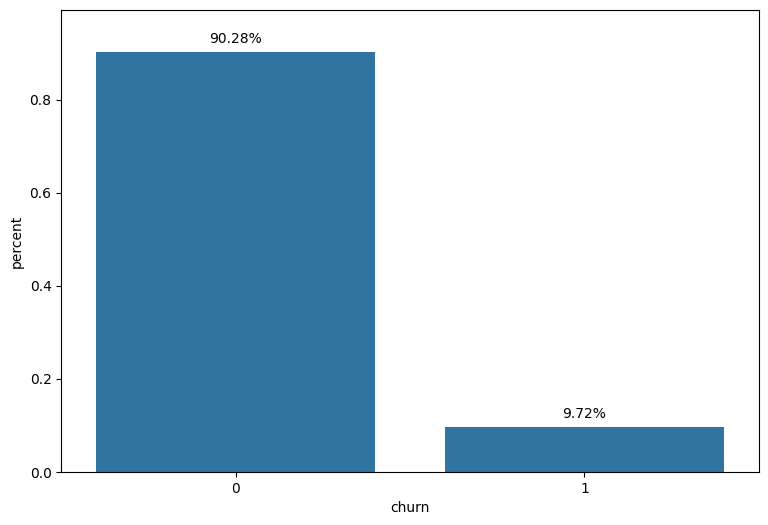

In [ ]:
plot_bar_chart_with_percent_label(df=client, target_variable='churn', gap_label_bar=0.02)

##Create a Bar Chart on Channel Sales

>Type 4 is the most common sales channel. However, type 1 , 3 and 6 are rarely being preferred

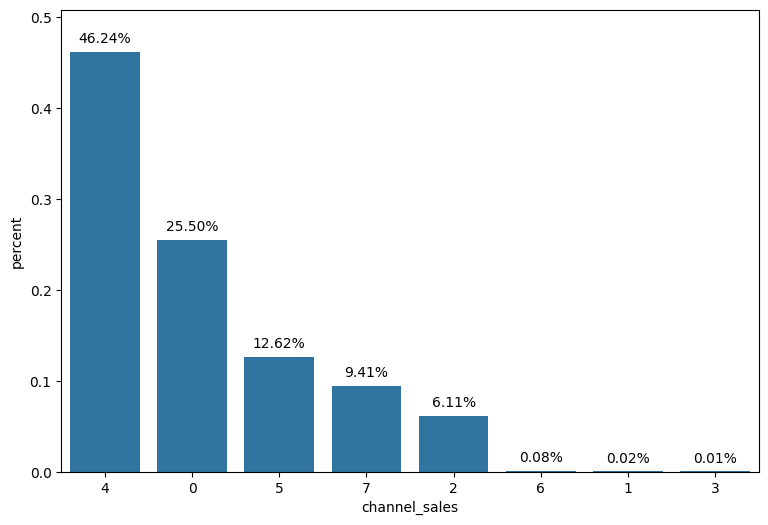

In [ ]:
# Let's check categorical feature distribution as per percent label

plot_bar_chart_with_percent_label(df=client, target_variable='channel_sales', if_sort=True, gap_label_bar=0.01)

##Create a Bar Chart on Origin Up

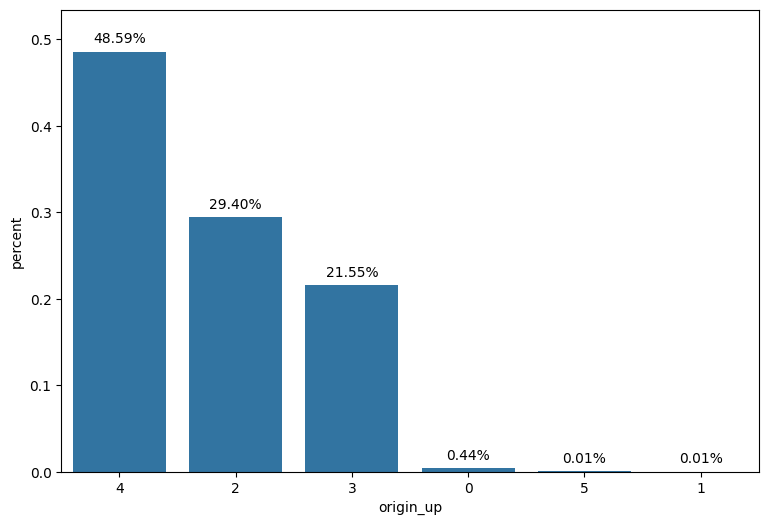

In [ ]:
plot_bar_chart_with_percent_label(df=client, target_variable='origin_up', if_sort=True, gap_label_bar=0.01)

##Create a Stacked Bar Chart on Channel Sales

>This explores which sales channels result in switches at what percentage

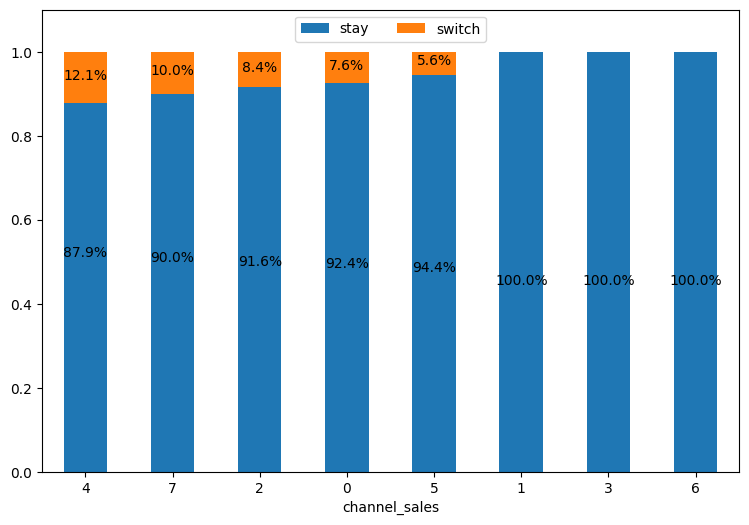

In [ ]:
# Let's visualize the feature distribution about the churning customers and non-churning customers.

plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='channel_sales', if_sort=True)

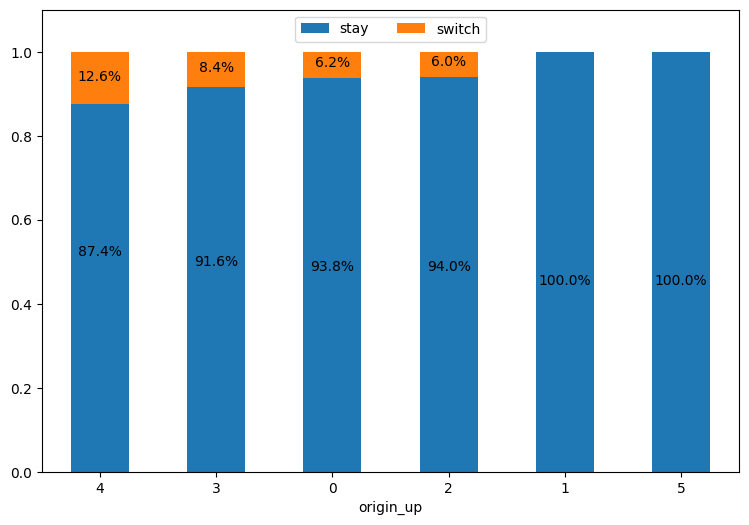

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='origin_up', if_sort=True)

##Create a Bar Chart on the Contract Year

>This explores sales by year as a percentage

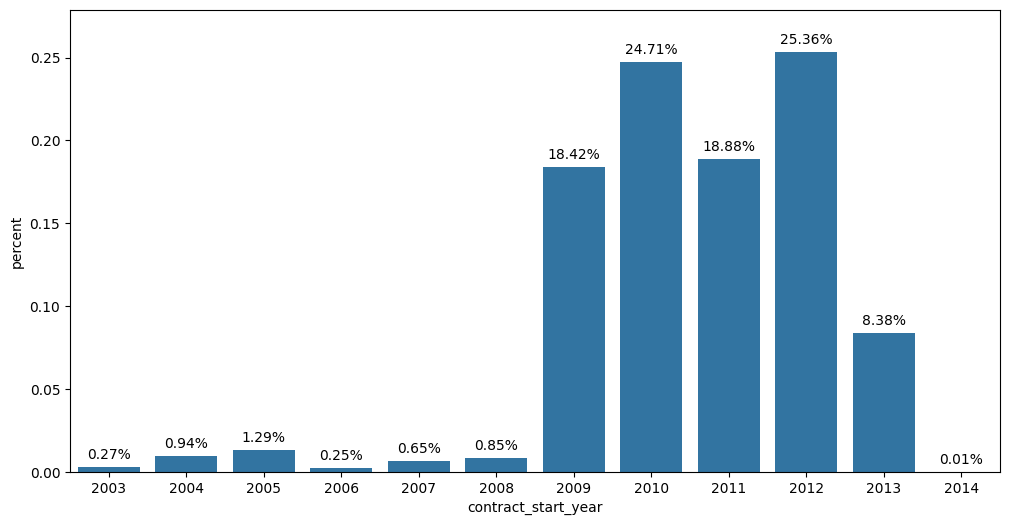

In [ ]:
plot_bar_chart_with_percent_label(df=client, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

##Create a Stacked Bar Chart Incorporating Switches

>This explores switch rates by year

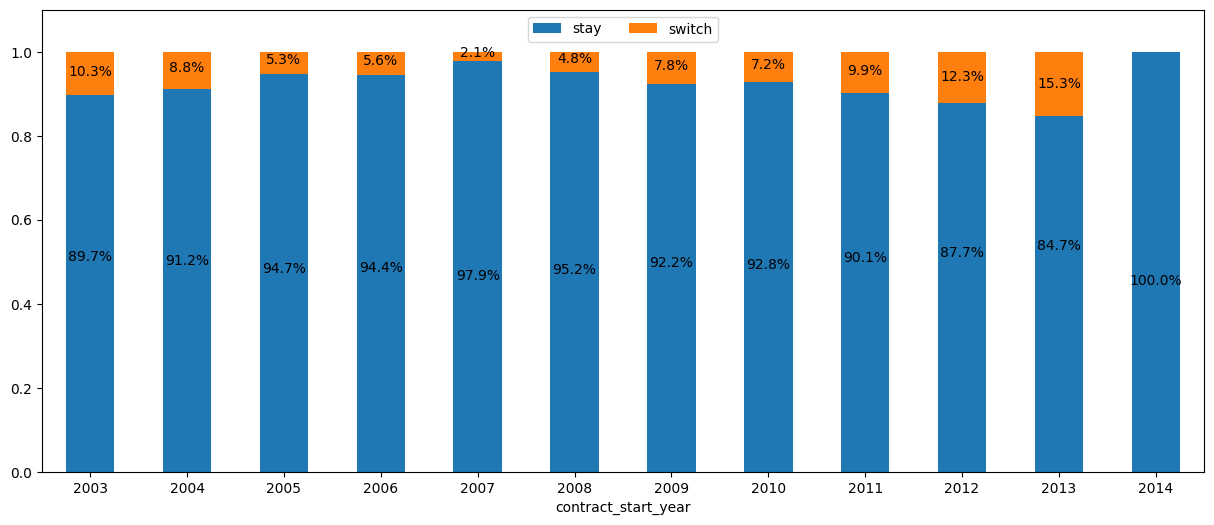

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

##Create a Bar Chart for Years No Gas

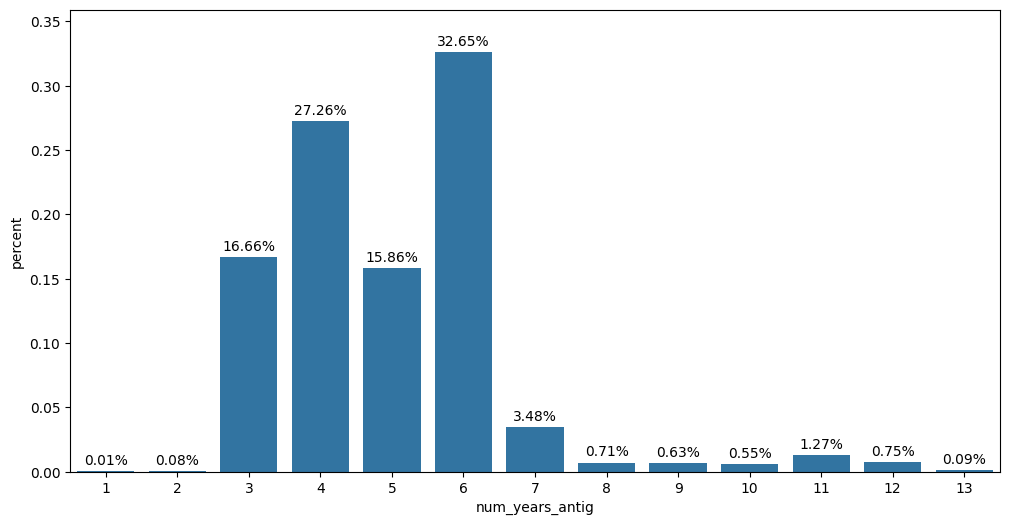

In [ ]:
plot_bar_chart_with_percent_label(df=client, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))

##Create a Stacked Bar Chart for years No Gas that Swtich

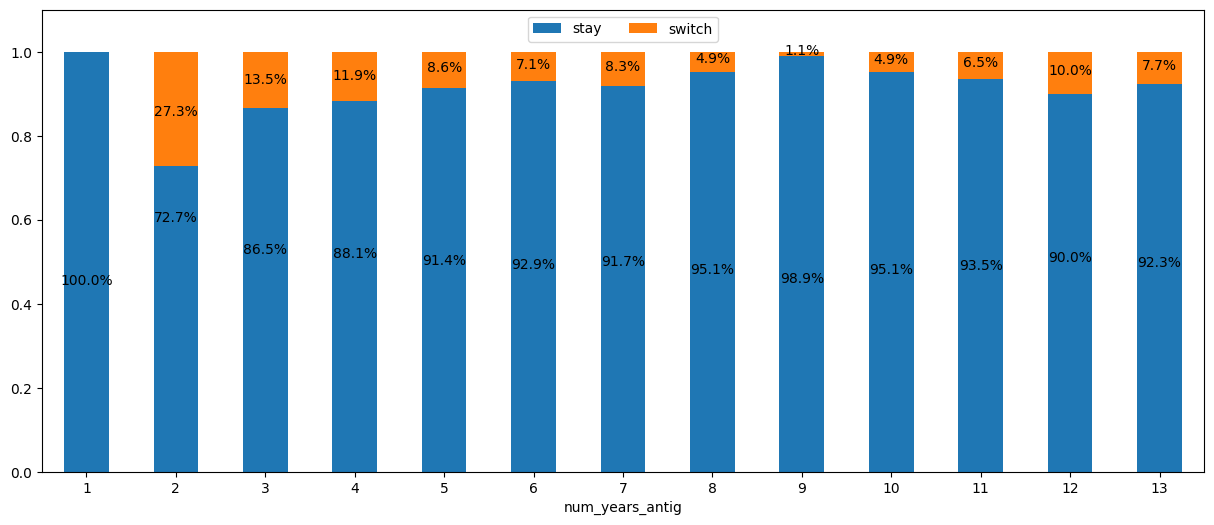

In [ ]:
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

##Create a Bar Chart Forecasting Discount Energy

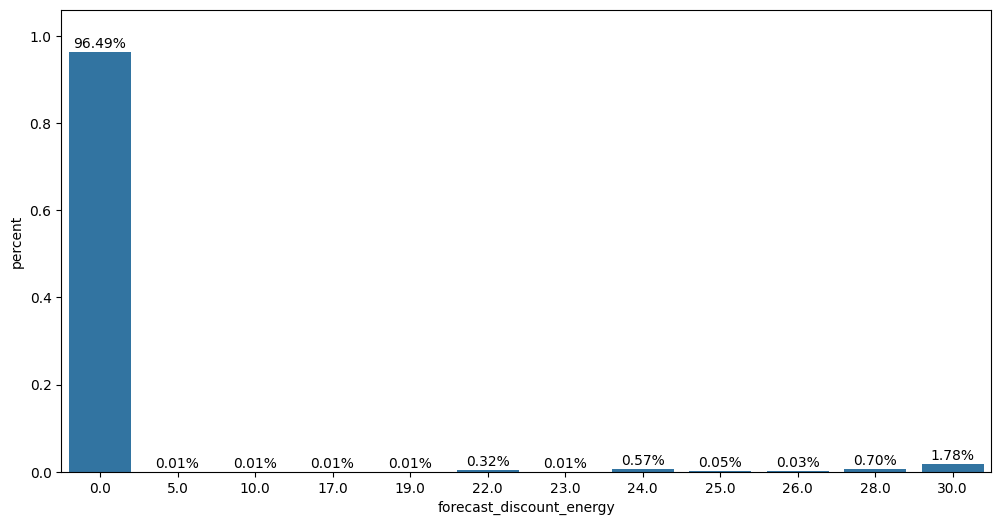

In [ ]:
plot_bar_chart_with_percent_label(df=client, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))

##Create a Bar Chart Dual Gas/Electric Customers

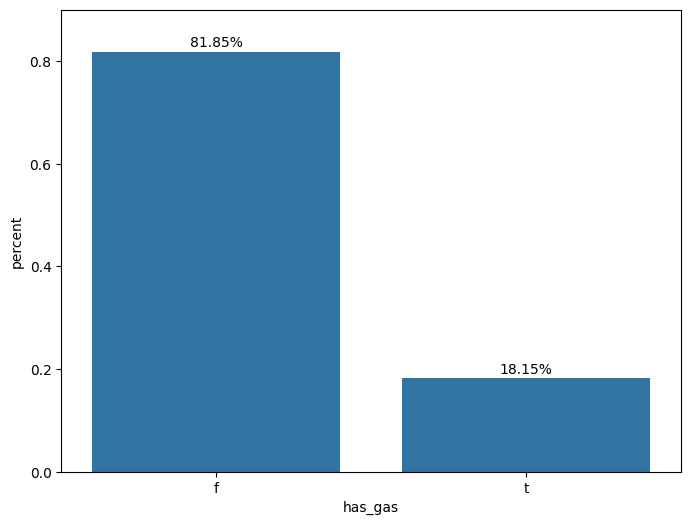

In [ ]:
#Let's check how many of clients are also gas clients

plot_bar_chart_with_percent_label(df=client, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

##Create a Stacked Chart for Which Ones Will Switch

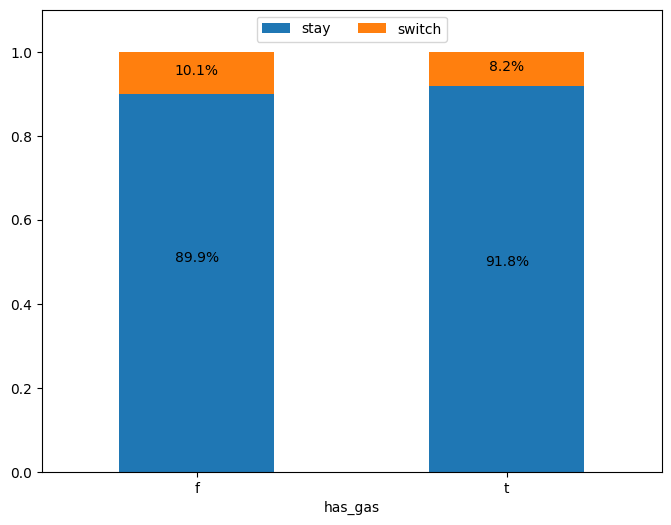

In [ ]:
# Now let's check which clients are more likely to churn between electricity and gas
plot_stacked_bar_with_percent_label_by_churn(df=client, target_variable='has_gas', if_sort=False, figsize=(8,6))

##Create a Bar Chart for number of of Active Products/Services by Sales Channel

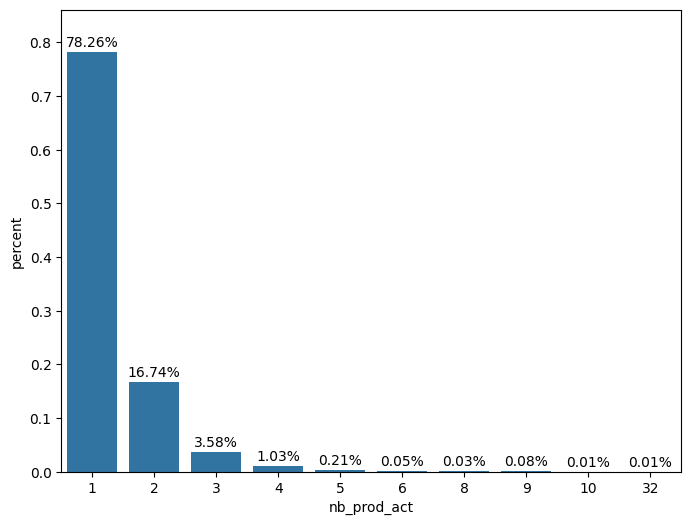

In [ ]:
# Let's check the customers based on the no. of active products and services
plot_bar_chart_with_percent_label(df=client, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))

##Create a Helper Function for Histograms by Churn

This code defines a Python function called plot_histogram_by_churn. This function is designed to create histograms for numerical features, with the option to differentiate the distributions based on whether a client has churned or not.
Here's a breakdown:
* **def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True)::** This line defines the function plot_histogram_by_churn and its parameters:
    * df: The DataFrame containing the data.
    * target_variable: The name of the numerical column you want to plot a histogram for.
    * figsize=(20,5): The size of the figure (plot) to be created. It defaults to 20 inches wide and 5 inches tall.
    * bins=100: The number of bins to use in the histogram. It defaults to 100.
    * if_churn=True: A boolean parameter that determines whether the histogram should be split by the 'churn' column. It defaults to True.
* fig = **plt.figure(figsize=figsize):** This line creates a new figure with the specified size.
* if *if_churn::* This checks if the if_churn parameter is True.
    * **ax = cat.histplot(data=df, x=target_variable, bins=bins, hue='churn')** If if_churn is True, this line uses cat.histplot (presumably from the seaborn library, often imported as sns or catplot) to create a histogram.
        * data=df: Specifies the DataFrame to use.
        * x=target_variable: Specifies the numerical column for the x-axis.
        * bins=bins: Sets the number of bins.
        * hue='churn': This is the key part that splits the histogram based on the unique values in the 'churn' column, allowing you to see the distribution of the target_variable for both churned and non-churned clients.
* **else::** This is executed if if_churn is False.
    * **ax = cat.histplot(data=df, x=target_variable, bins=bins):** In this case, a simple histogram of the target_variable is created without splitting by 'churn'.
In summary, this function is a reusable tool for visualizing the distribution of numerical features in your dataset, giving you the option to compare the distributions for churned and non-churned clients.


In [ ]:
# Now let's visualize the distribution of continuous numeric features
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = cat.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = cat.histplot(data=df, x=target_variable, bins=bins)

##Show Histograms

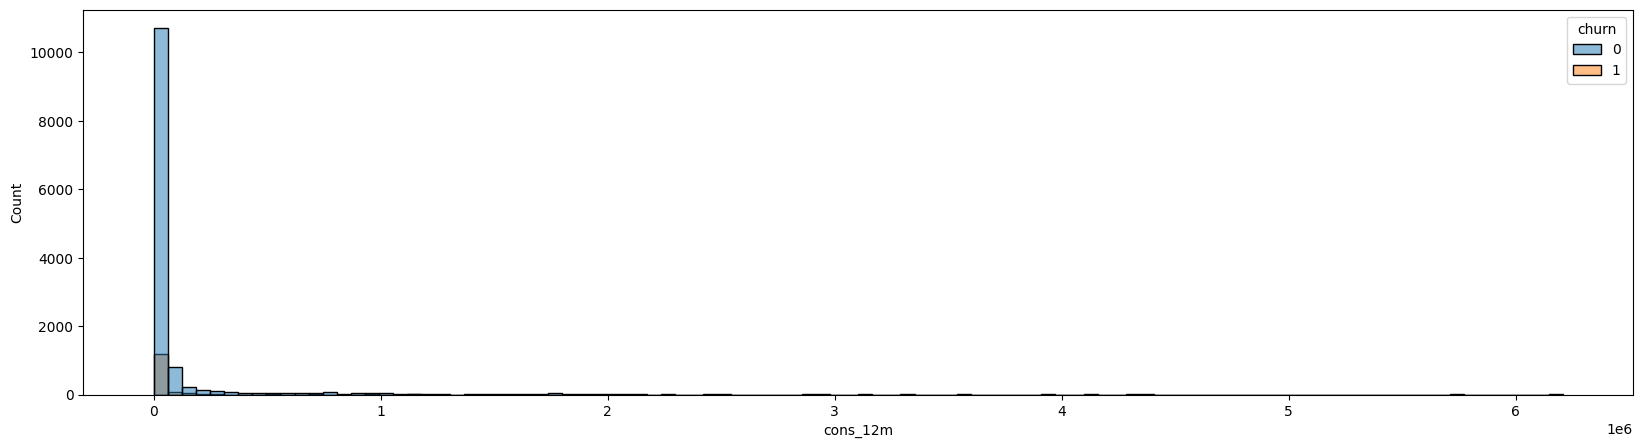

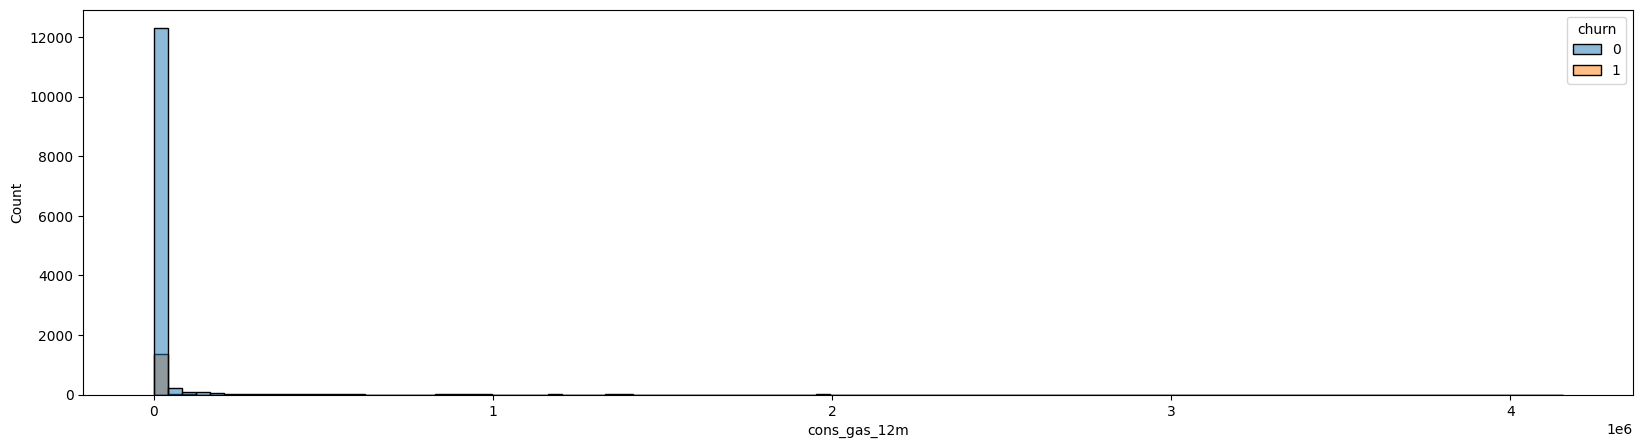

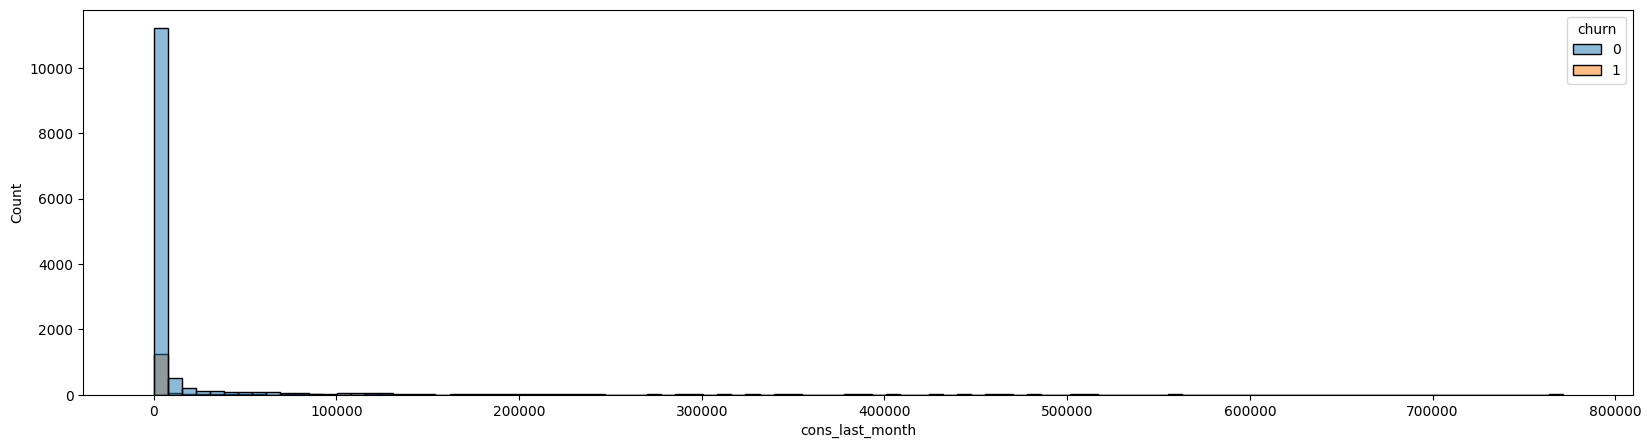

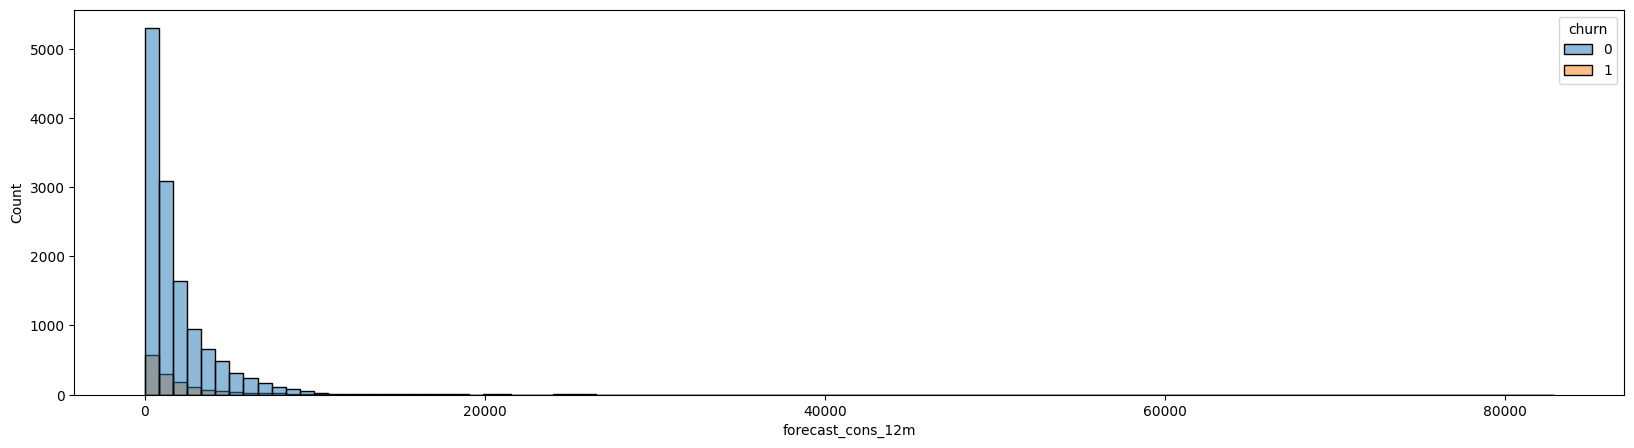

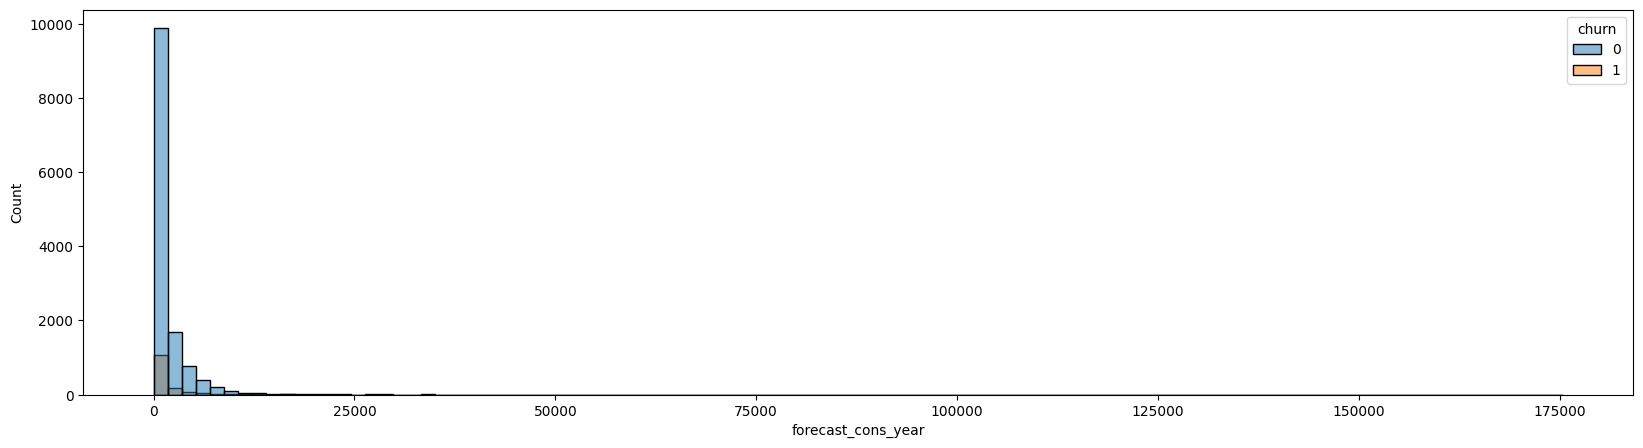

In [ ]:
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(df=client, target_variable=attr)

In [ ]:
# Let's visualize price dataset
price['id'].value_counts().value_counts()

,count
count,
12,15990
11,83
10,11
9,6
8,3
7,3


In [ ]:
price['price_date'].value_counts()

,count
price_date,
2015-12-01,16094
2015-08-01,16094
2015-07-01,16090
2015-11-01,16087
2015-10-01,16085
2015-06-01,16085
2015-09-01,16082
2015-02-01,16082
2015-05-01,16080


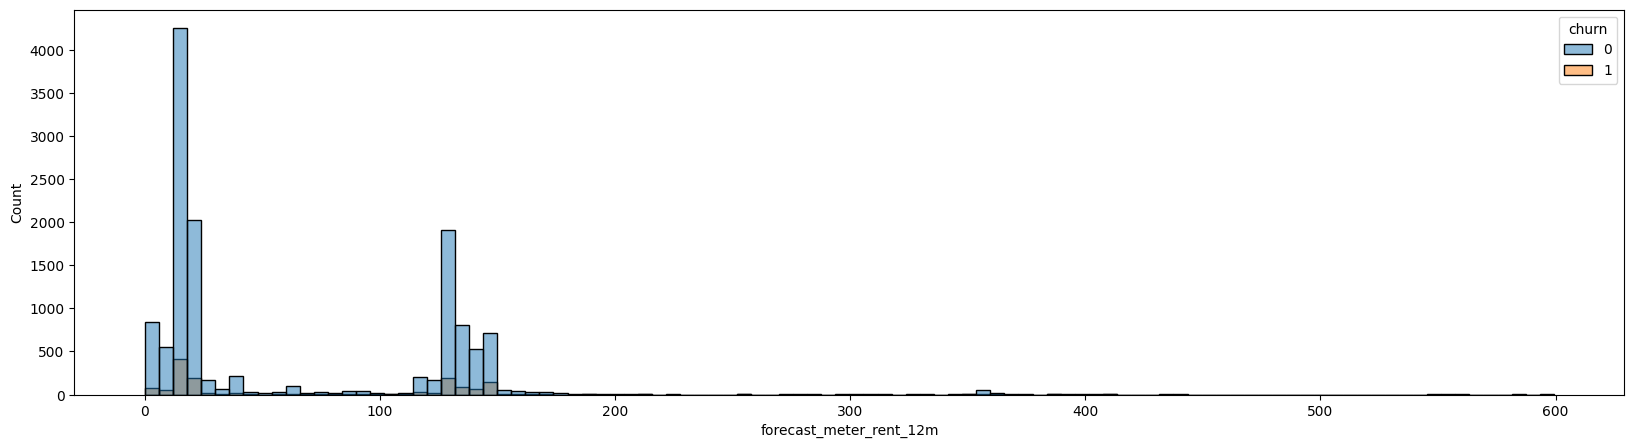

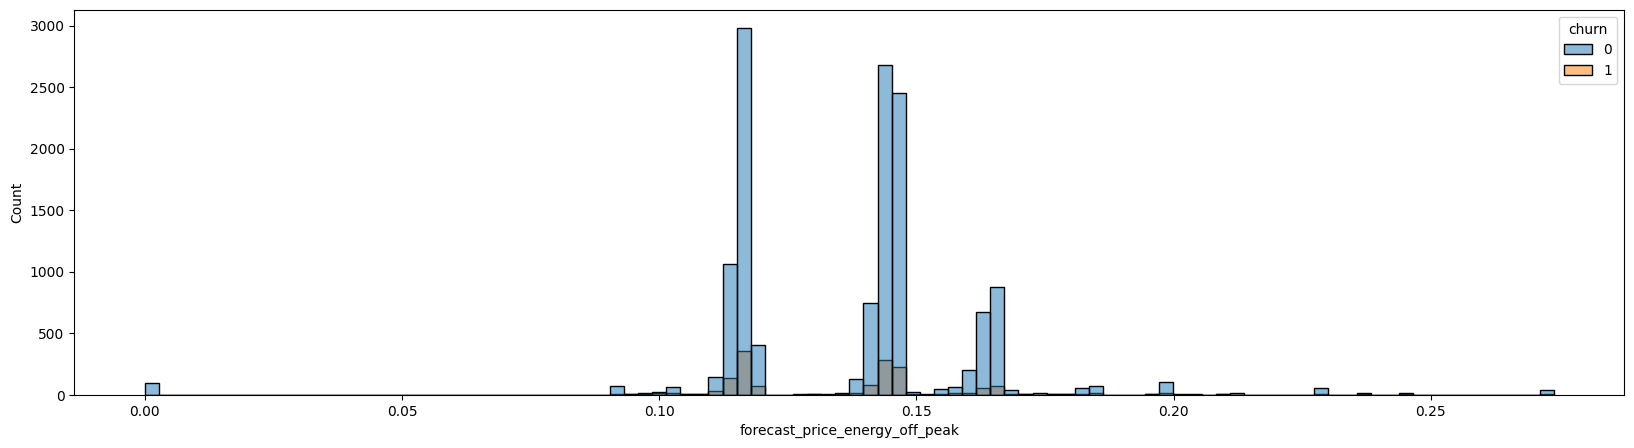

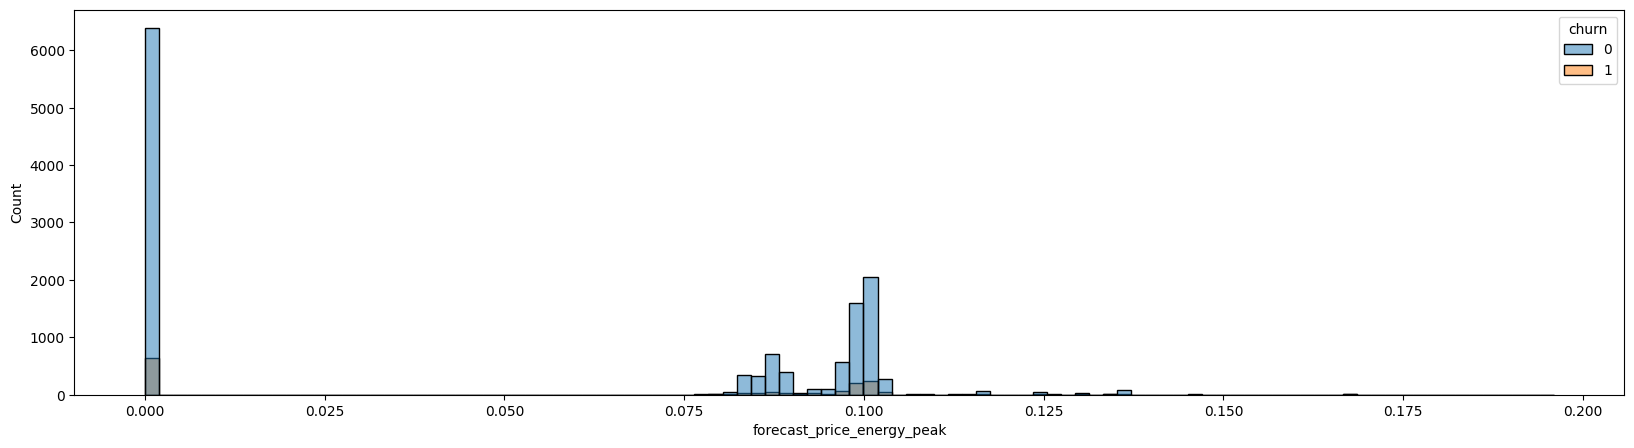

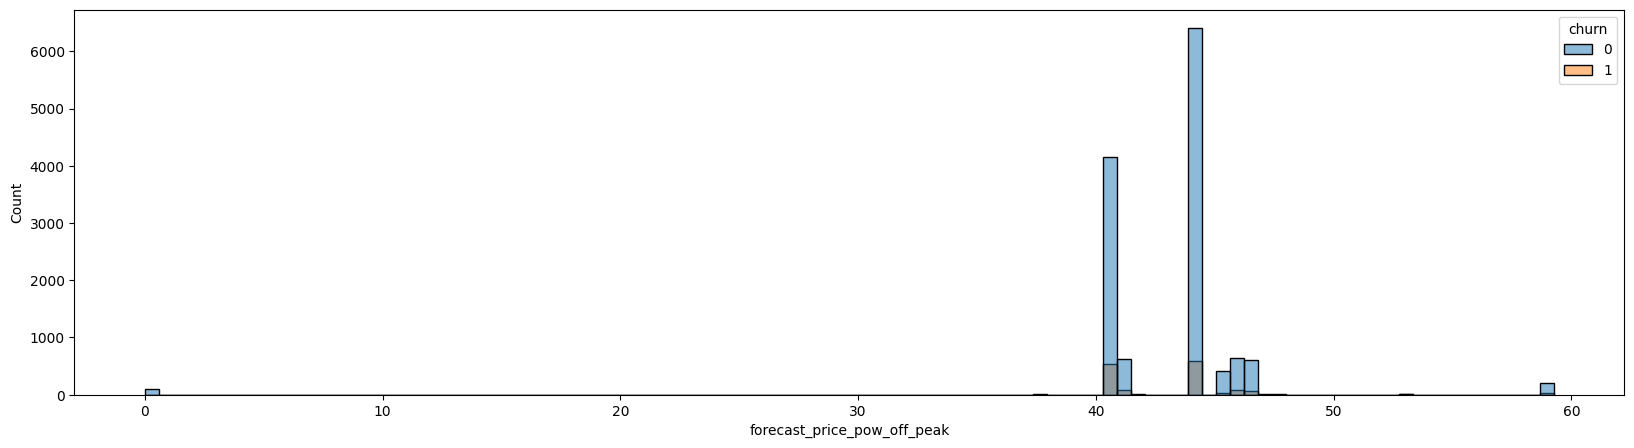

In [ ]:
for attr in ['forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak',]:
    plot_histogram_by_churn(df=client, target_variable=attr)

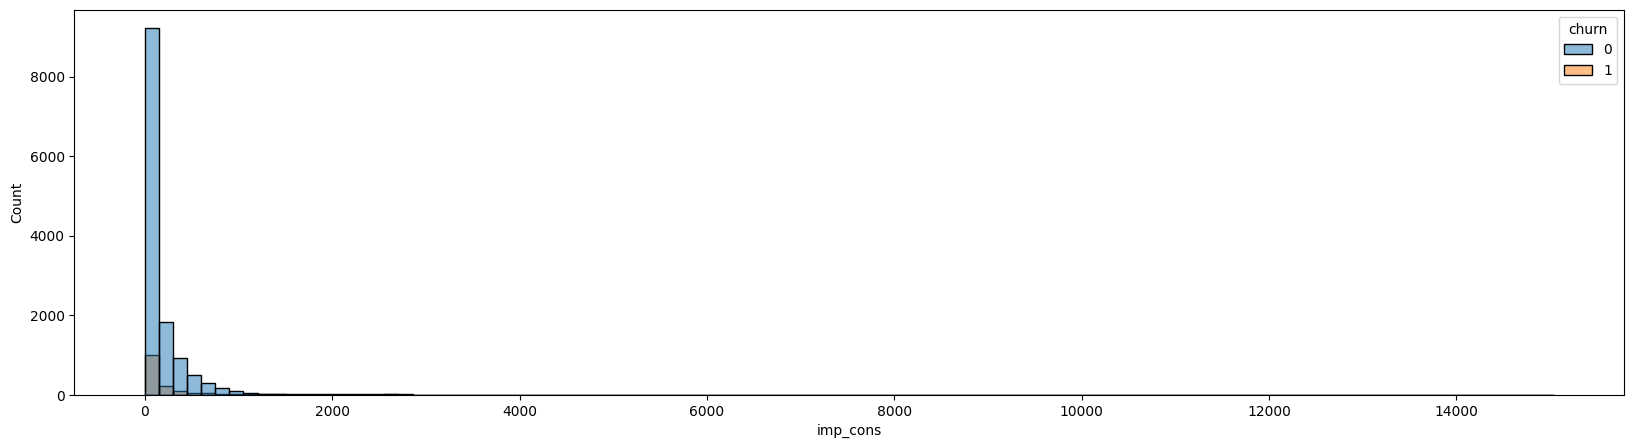

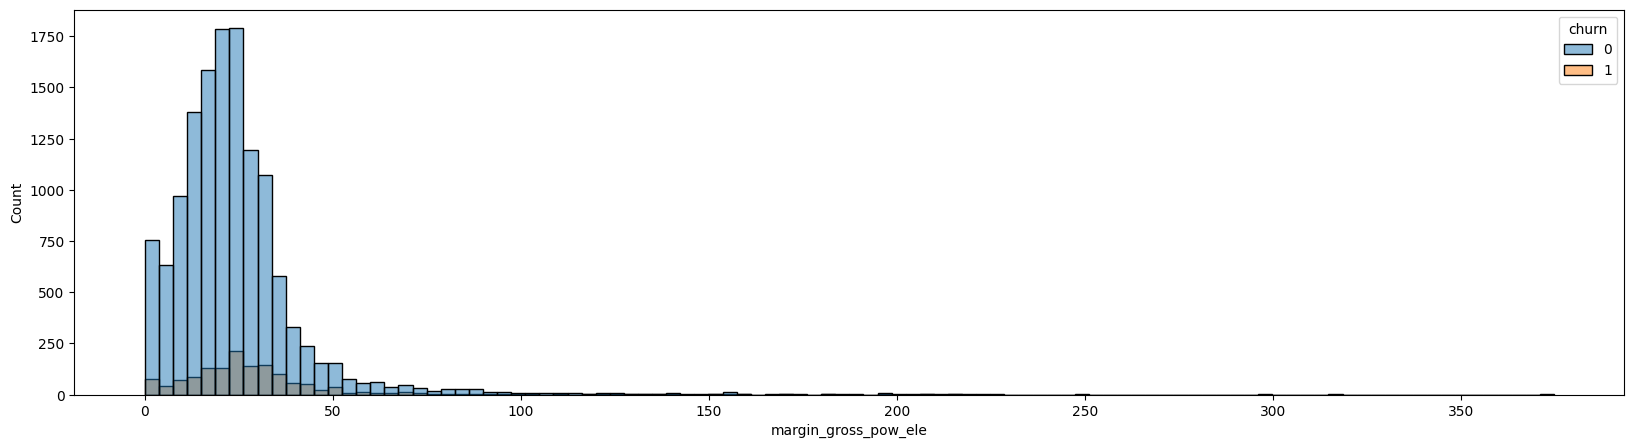

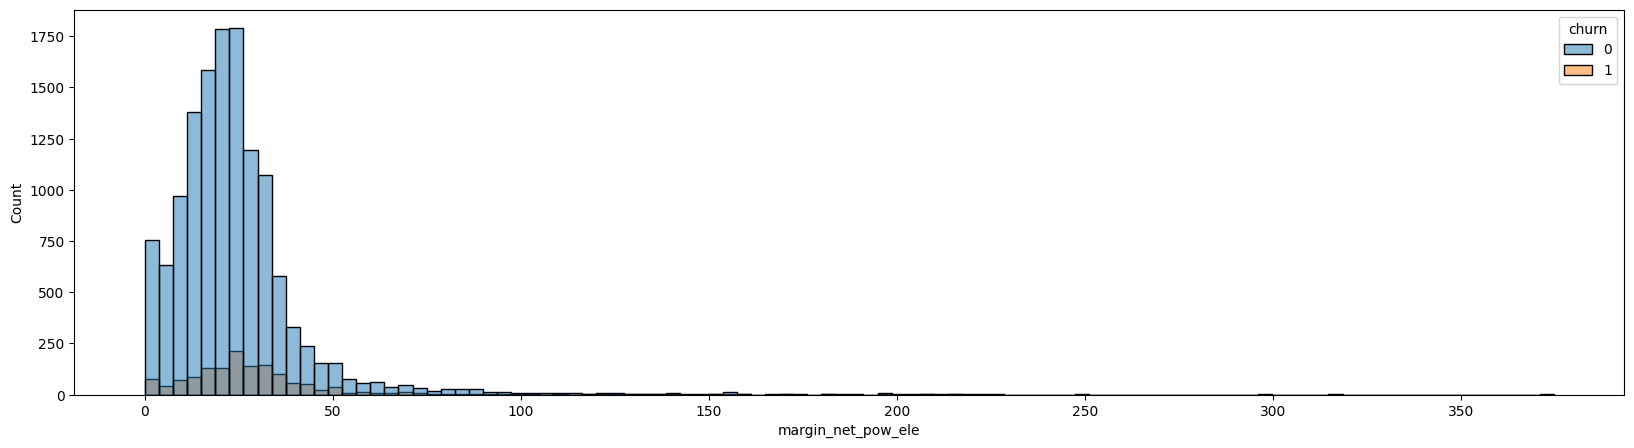

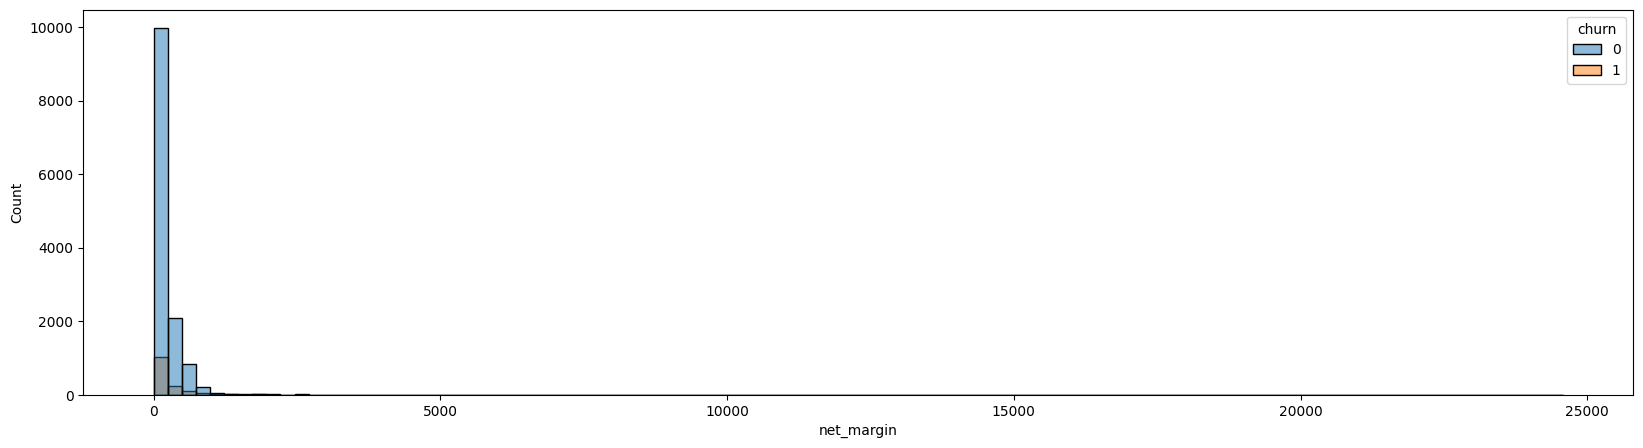

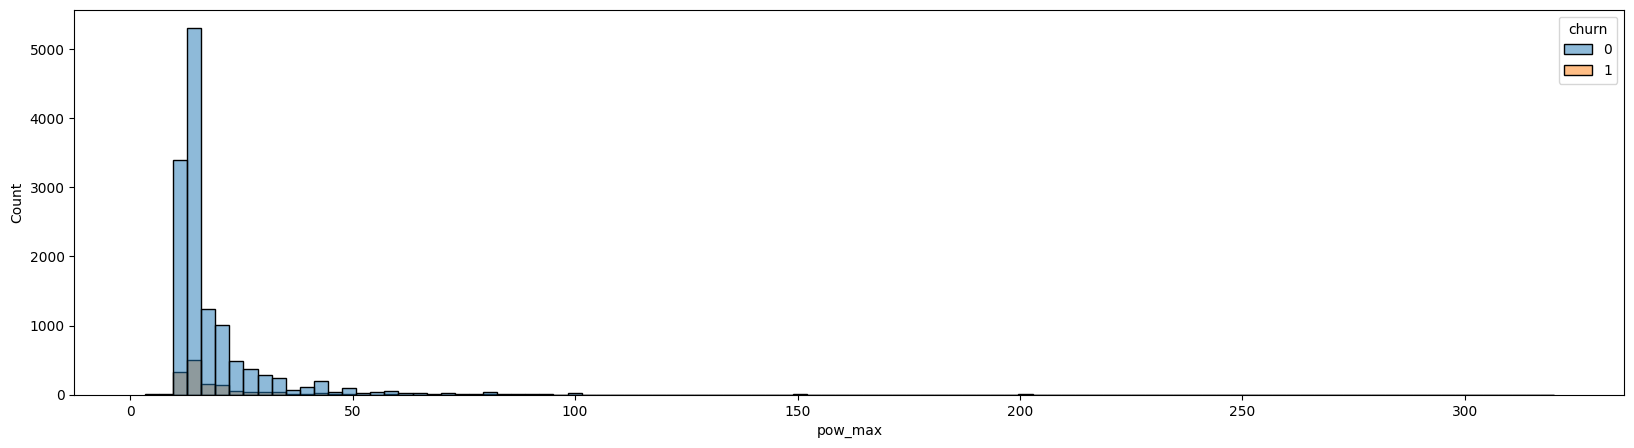

In [ ]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client, target_variable=attr)

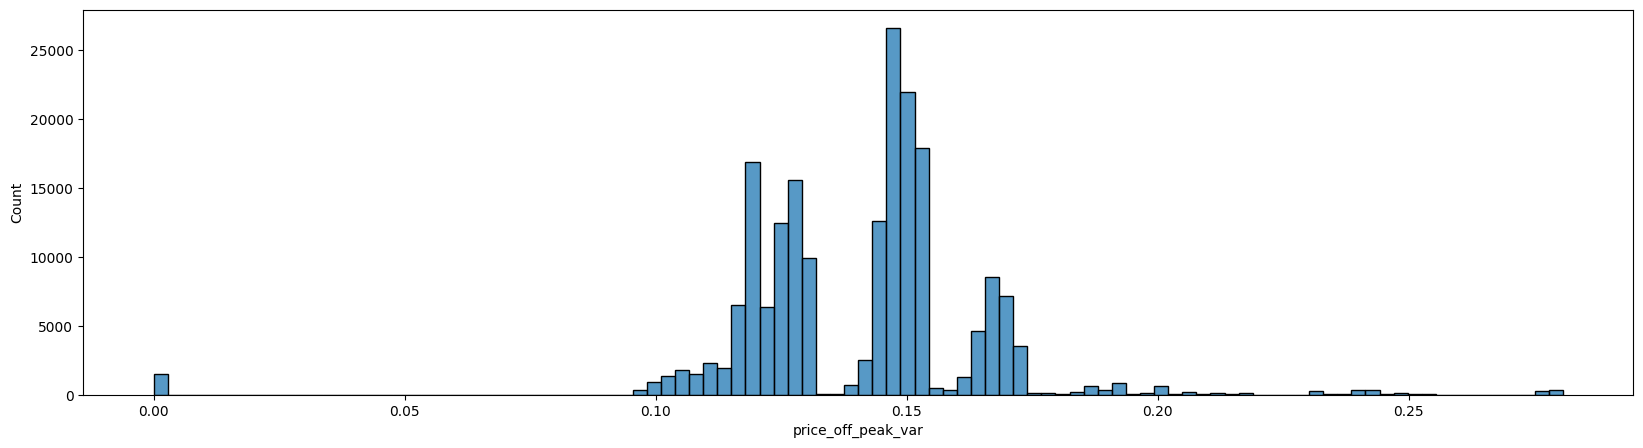

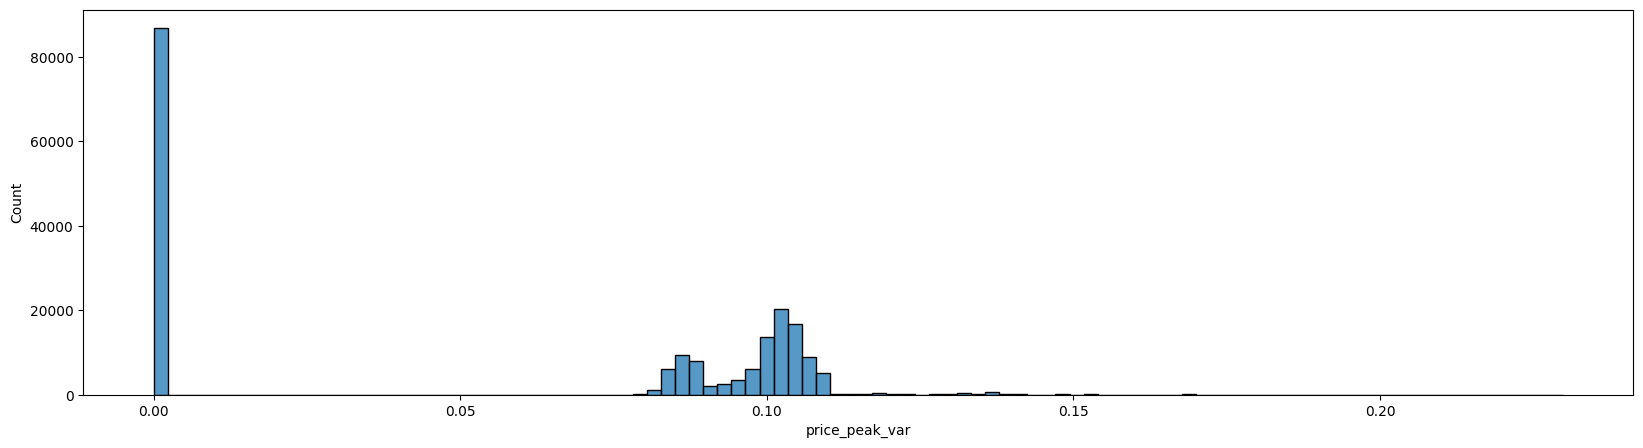

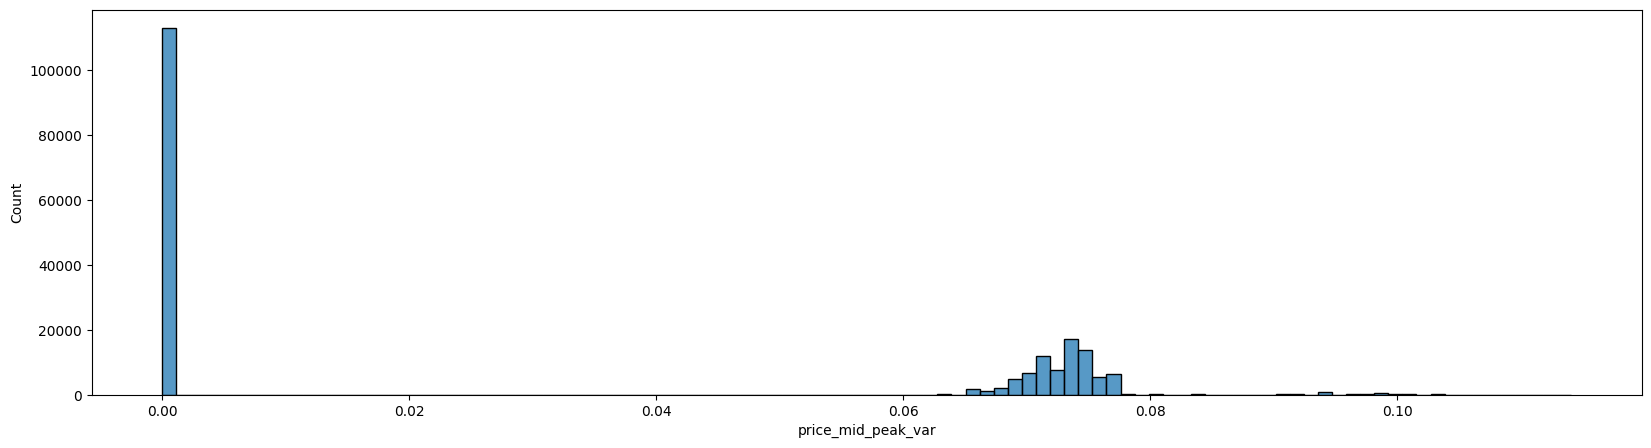

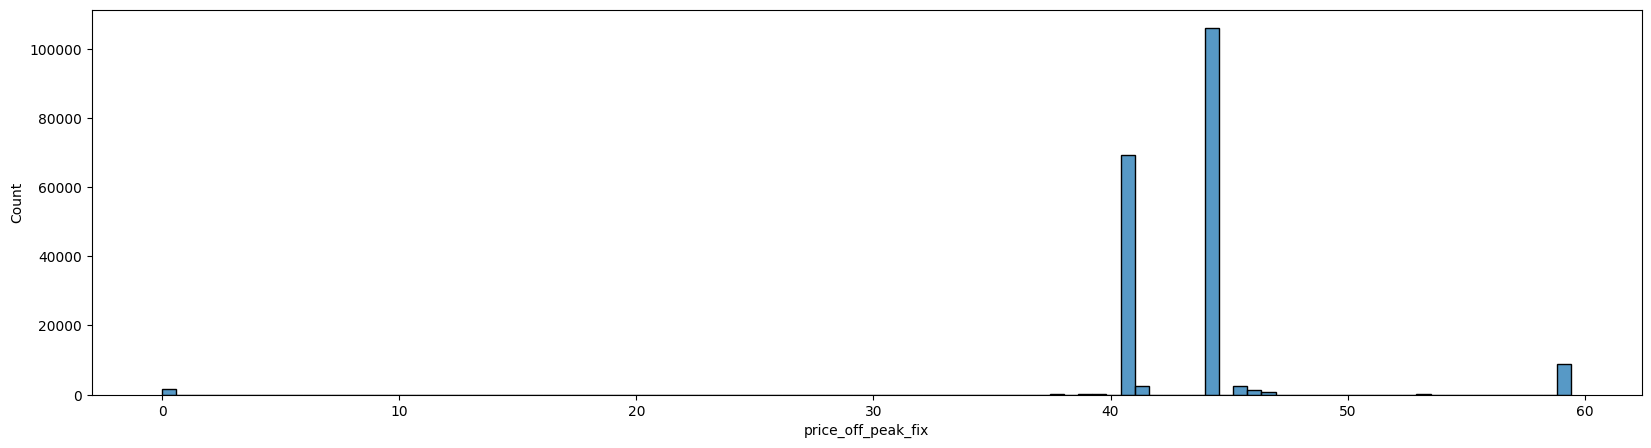

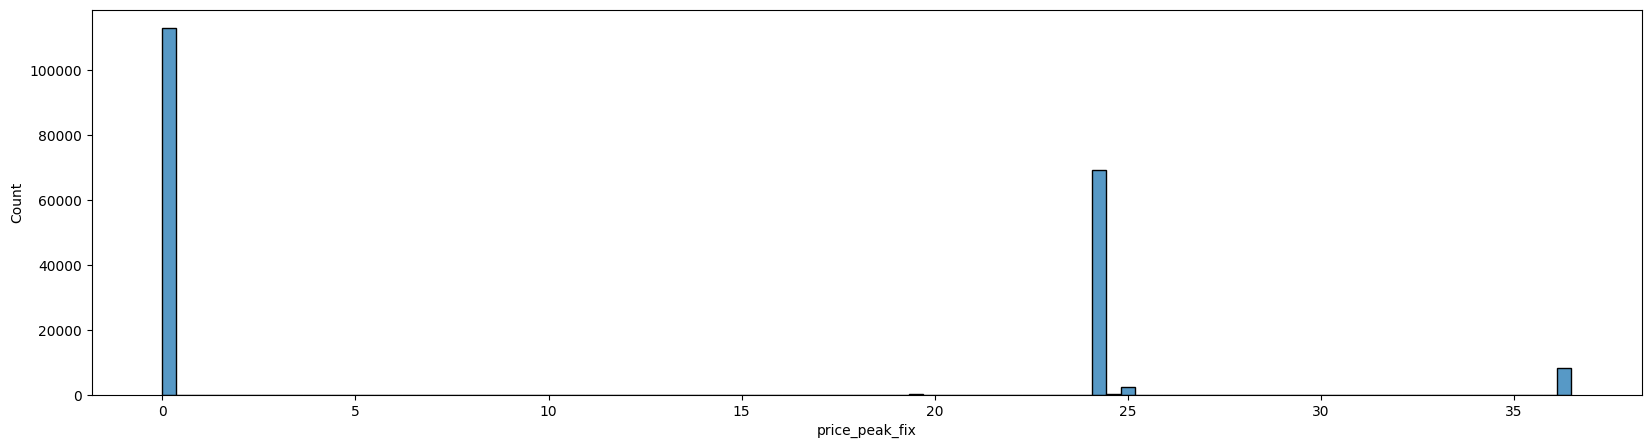

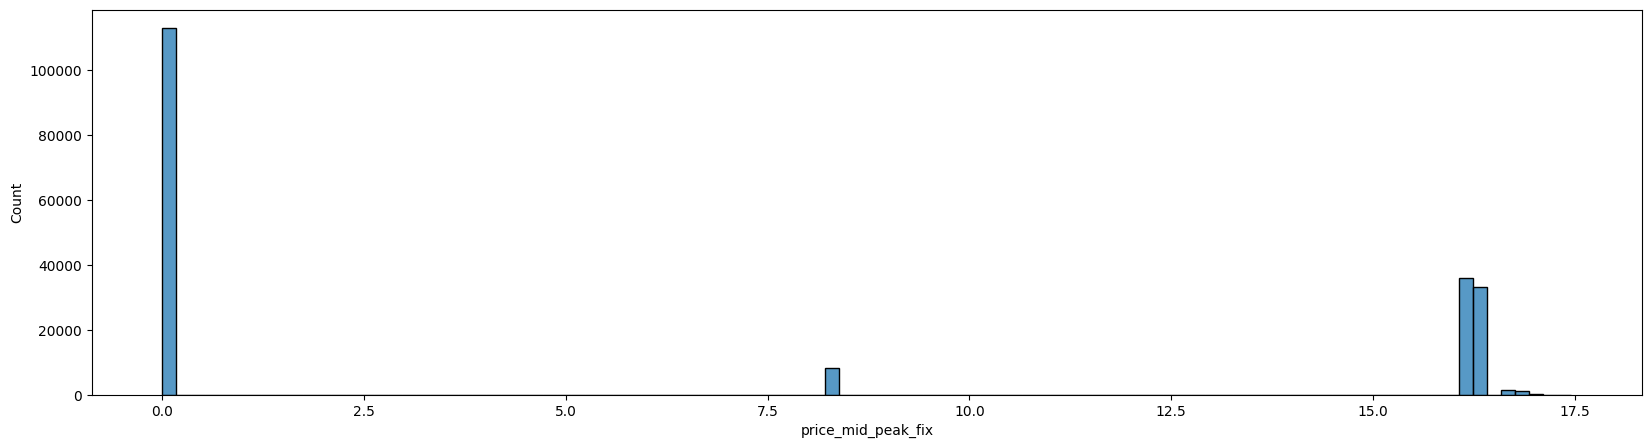

In [ ]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price, target_variable=attr, if_churn=False)

In [ ]:
# Now let's check customer sensitivity to prices
# Initially, let's check the maximum, minimum and average prices over the entire year

stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.123086,0.113068,0.118757,0.100505,0.095385,0.098292,0.069463,0.068646,0.069032,40.728885,40.565969,40.647427,24.43733,24.339578,24.388455,16.291555,16.226383,16.258971
4,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Now let's merge client dataset with price to add churn data

price_stat = price_stat.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset
price_stat = price_stat.dropna(subset=['churn']).reset_index(drop=True)
price_stat.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.126076,0.107582,0.103413,0.105542,0.075514,0.072089,0.074921,40.728885,40.728885,40.728885,24.43733,24.437330,24.437330,16.291555,16.291555,16.291555,0.0


In [ ]:
# Now let's calculate the maximum changes occured in prices over the whole year

for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max'] - price_stat[f'{attr}_min']
price_stat.head(7)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.126076,0.107582,0.103413,0.105542,0.075514,0.072089,0.074921,...,16.291555,16.291555,16.291555,0.0,0.008161,0.004169,0.003425,0.000000,0.000000,0.000000
5,00184e957277eeef733a7b563fdabd06,0.149555,0.145093,0.147637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000
6,001987ed9dbdab4efa274a9c7233e1f4,0.126336,0.118175,0.122756,0.104660,0.100491,0.102290,0.074570,0.071536,0.073030,...,16.291555,16.226389,16.258972,0.0,0.008161,0.004169,0.003034,0.162916,0.097749,0.065166


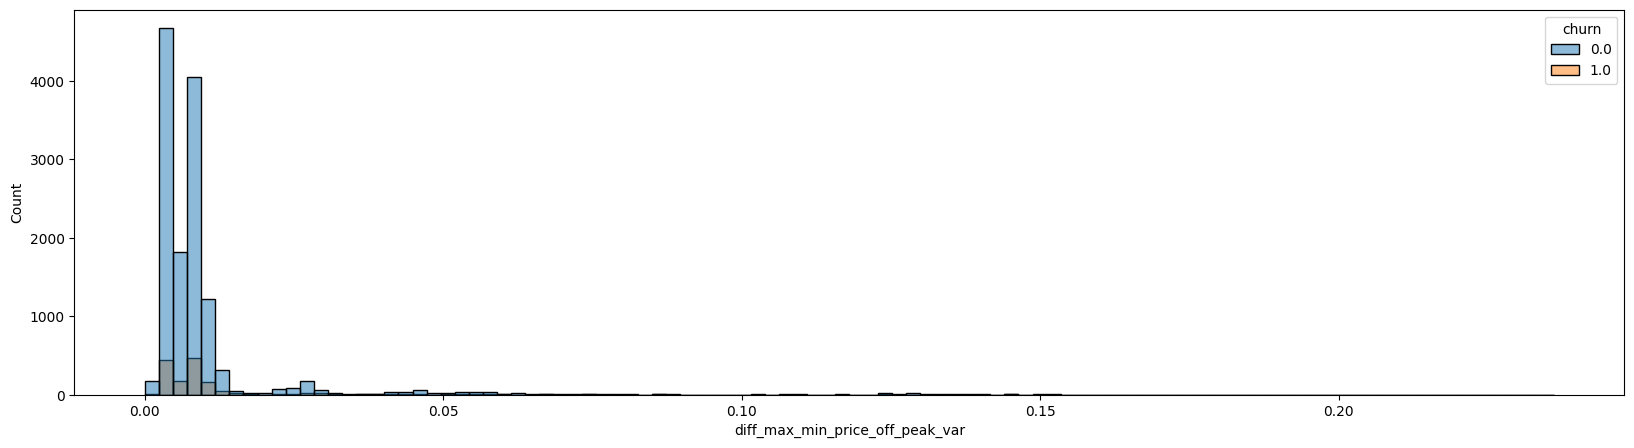

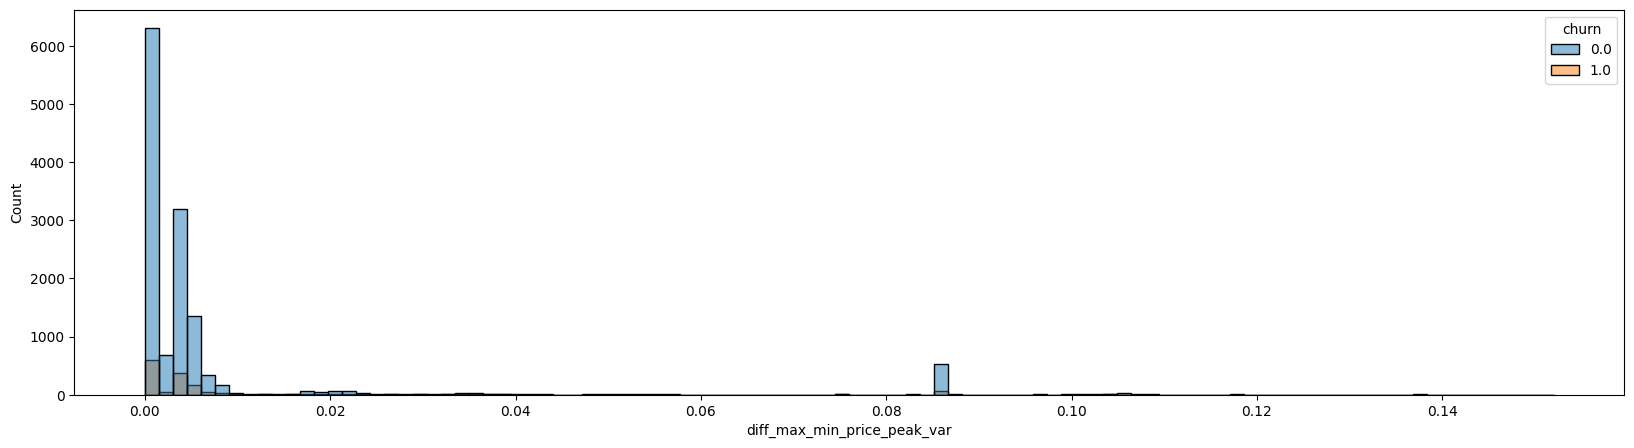

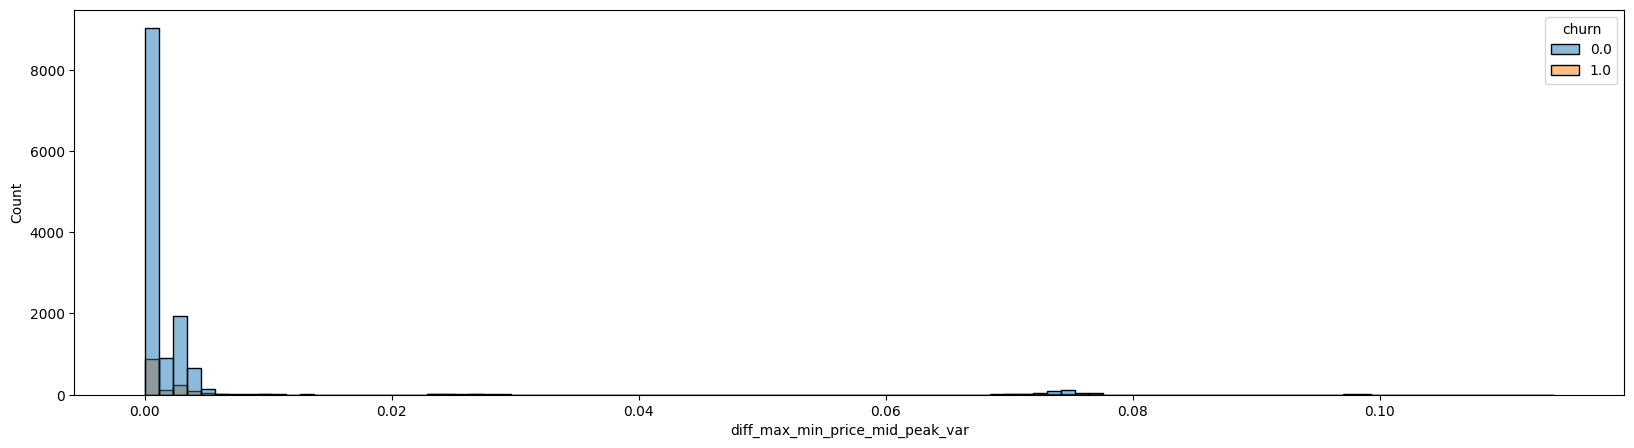

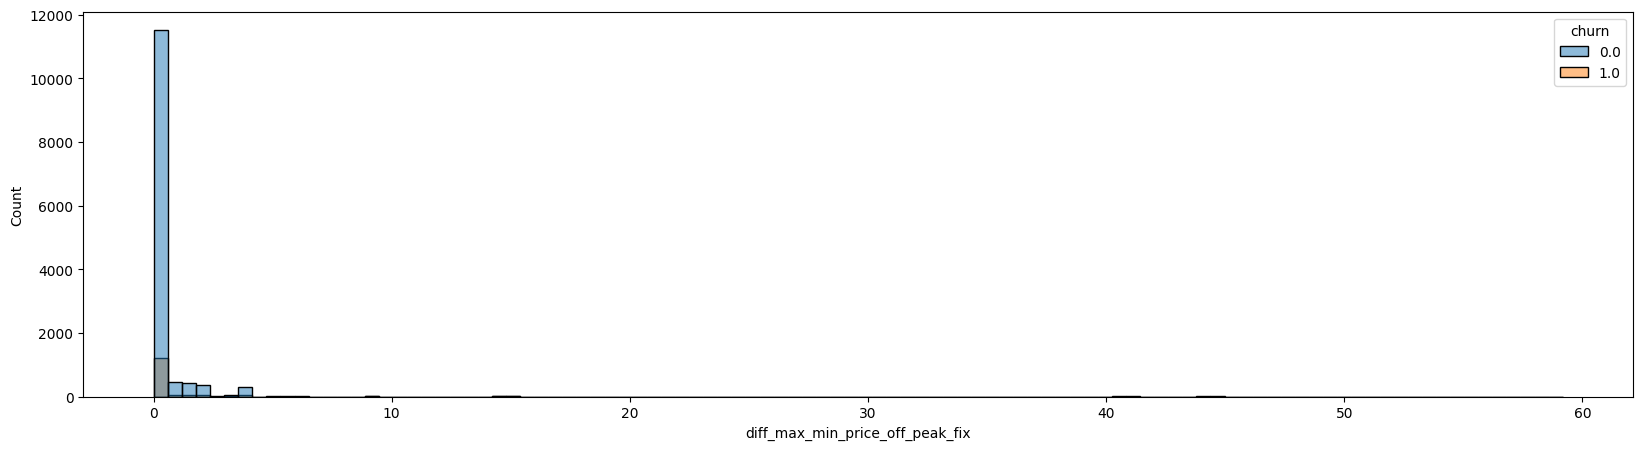

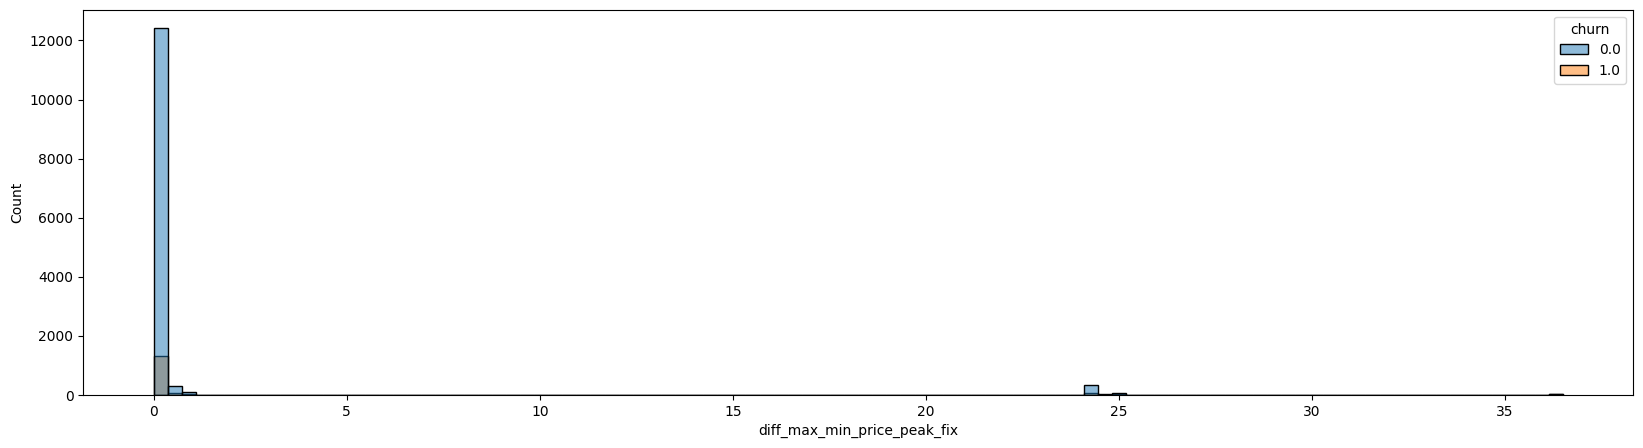

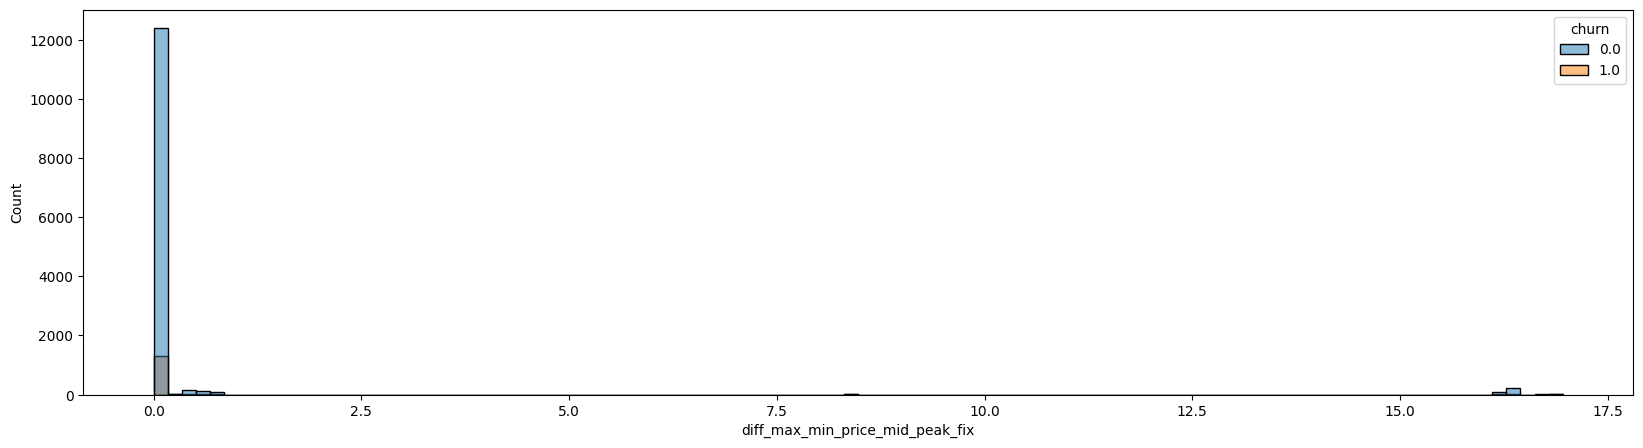

In [ ]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

In [ ]:
# Let's calculate the difference between the price last month (2015-12-01) and mean price.
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(7)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,...,0.003541,0.162916,0.097749,0.065166,0.021521,-0.103794,-0.073160,3.742978,-24.421038,-16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.177779,0.000000,0.000000,-0.027671,0.101071,0.075096,-3.656565,24.437330,16.291555
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.500000,0.000000,0.000000,-0.037615,0.000000,0.000000,-0.875000,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000001,0.000000,0.000000,-0.030332,0.099910,0.073935,-3.538045,24.437330,16.291555
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.126076,0.107582,0.103413,0.105542,0.075514,0.072089,0.074921,...,0.003425,0.000000,0.000000,0.000000,0.021524,-0.105542,-0.074921,3.715825,-24.437330,-16.291555
5,00184e957277eeef733a7b563fdabd06,0.149555,0.145093,0.147637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000001,0.000000,0.000000,-0.000617,0.000000,0.000000,0.177780,0.000000,0.000000
6,001987ed9dbdab4efa274a9c7233e1f4,0.126336,0.118175,0.122756,0.104660,0.100491,0.102290,0.074570,0.071536,0.073030,...,0.003034,0.162916,0.097749,0.065166,0.024844,-0.102290,-0.073030,3.797283,-24.388455,-16.258972


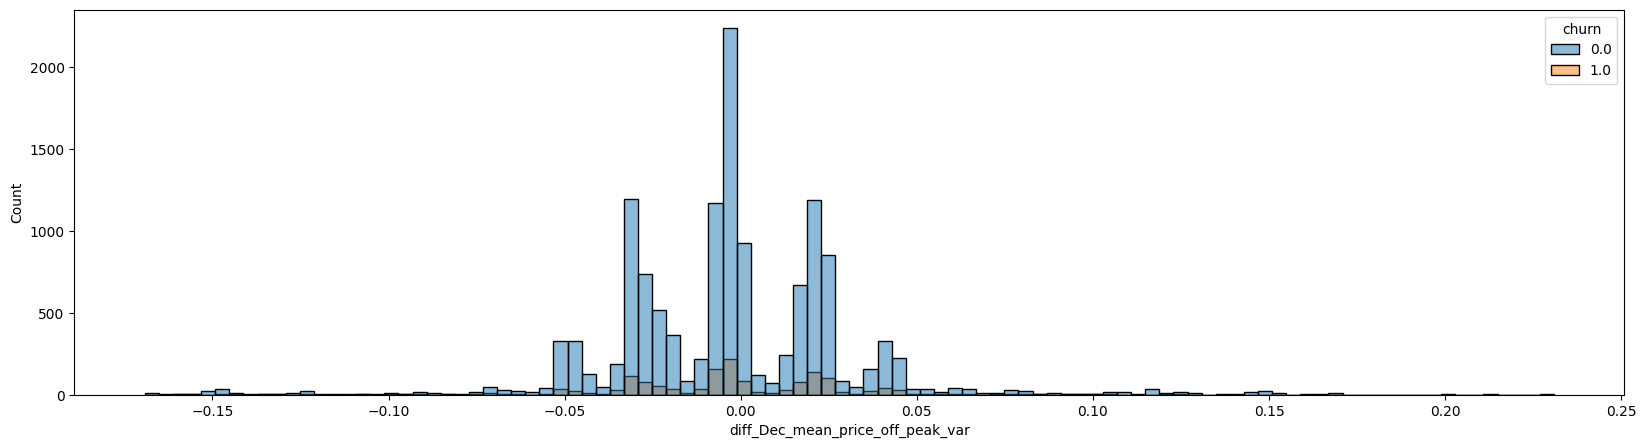

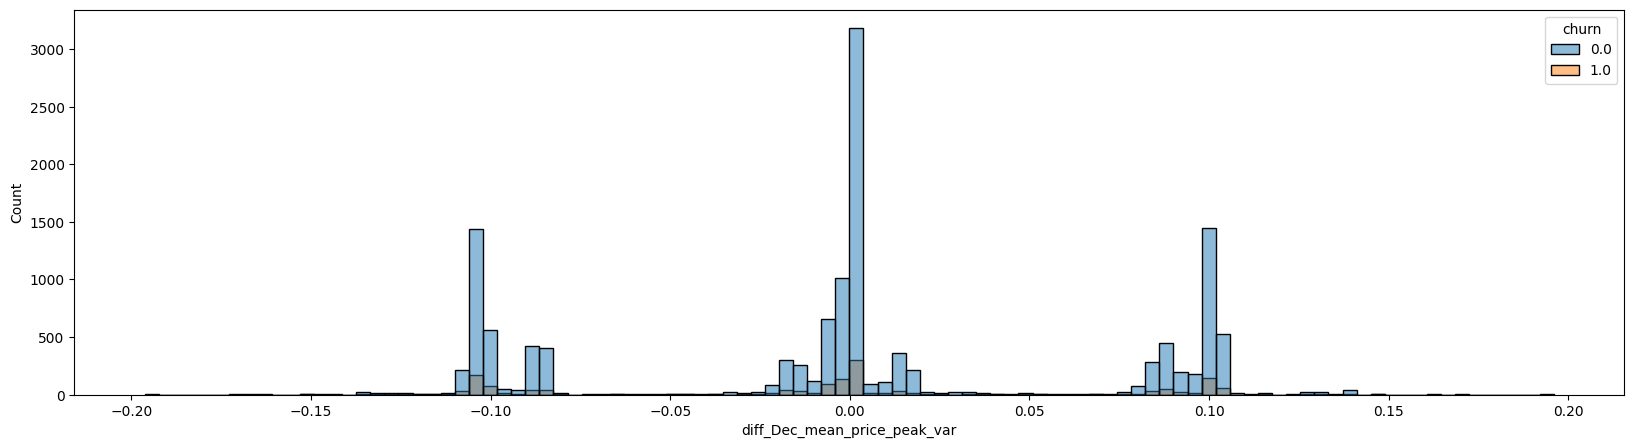

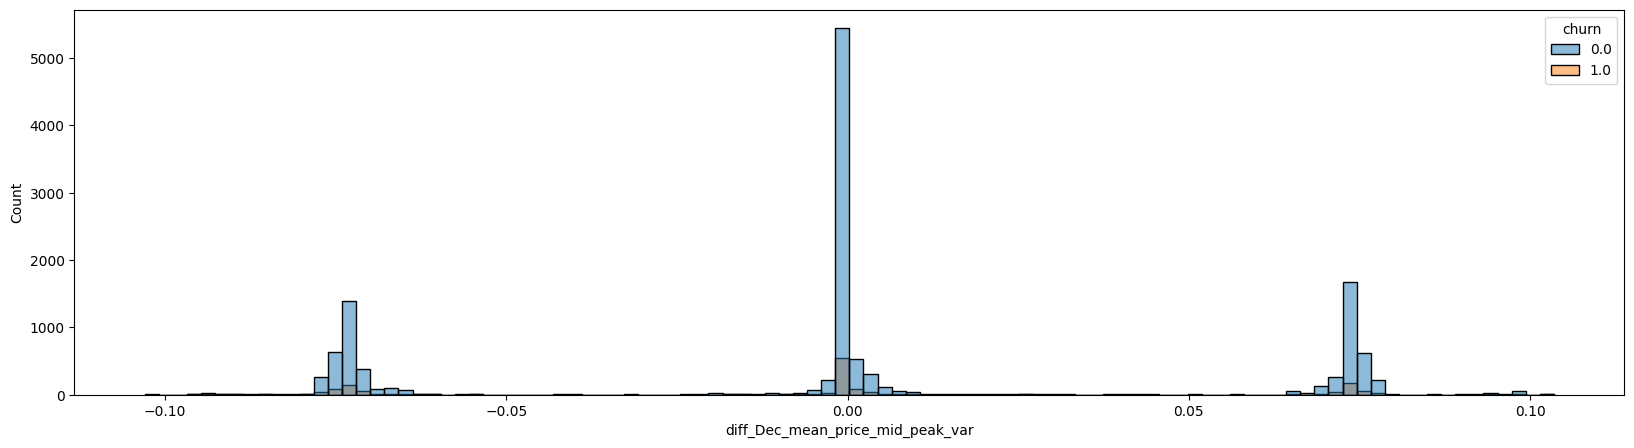

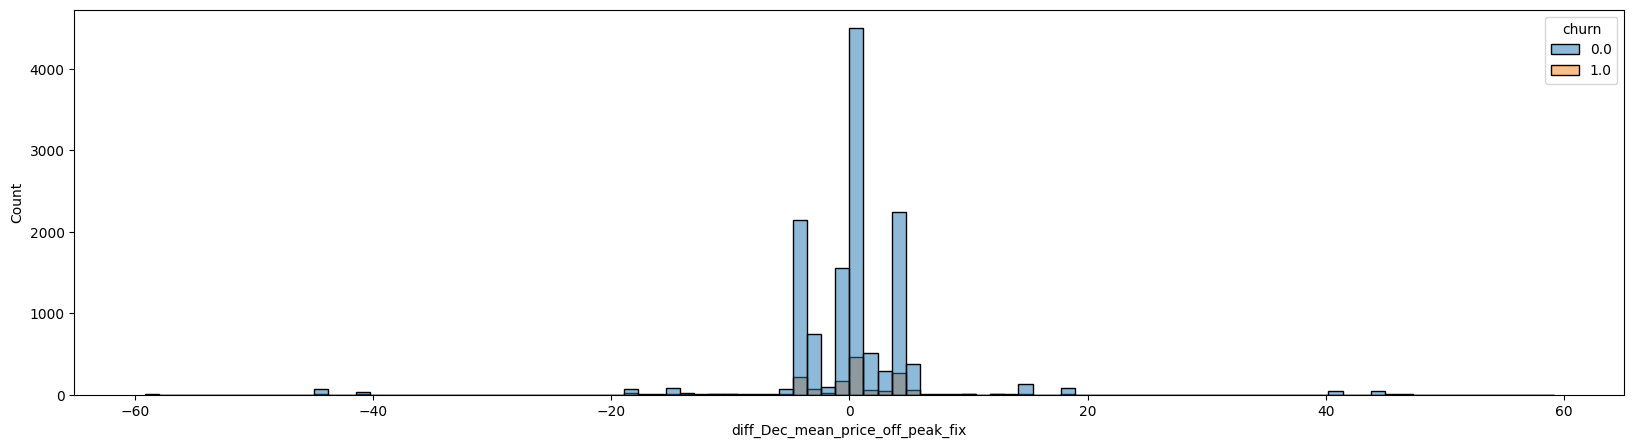

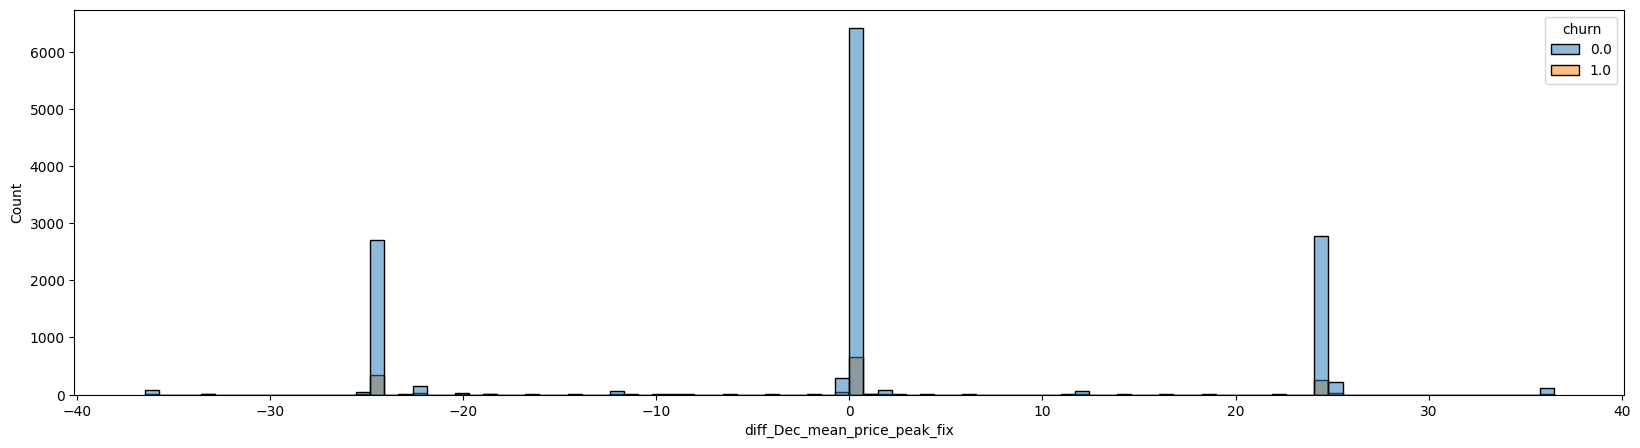

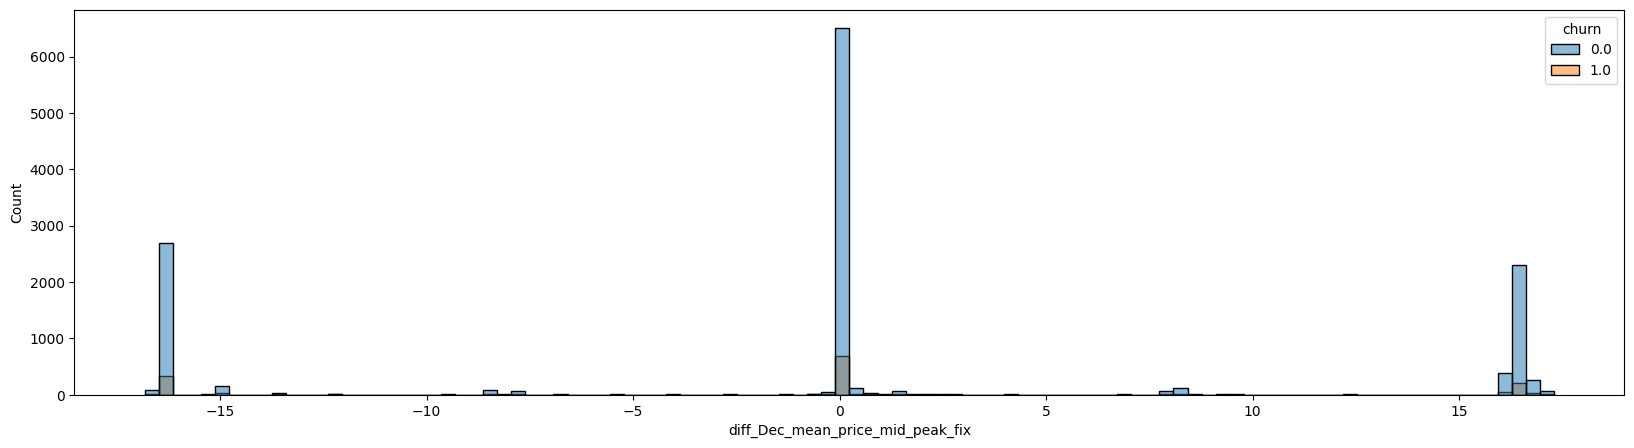

In [ ]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

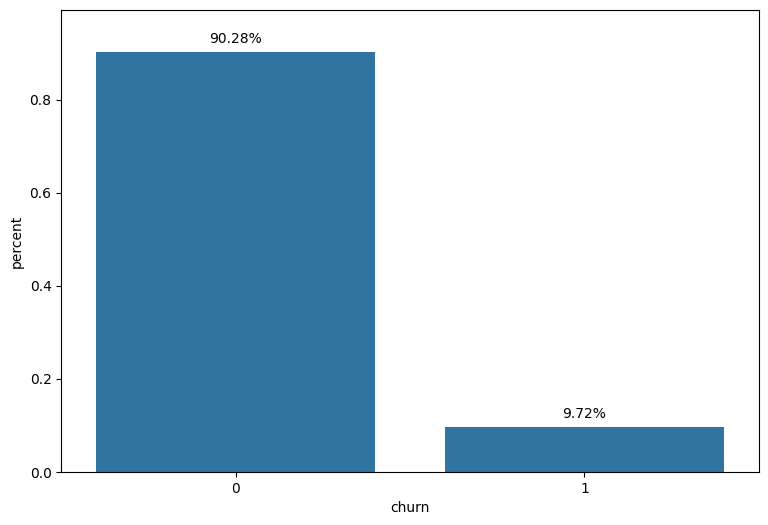

In [ ]:
# Now let's check whether changes in prices would affect customer churn
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

In [ ]:
price_stat_6_month = price[price['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0), price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()
# add churn values
price_stat_6_month = price_stat_6_month.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset
price_stat_6_month = price_stat_6_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(7)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,0.024593,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.025932,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.058081,-1.500000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.028590,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,0.024593,3.715825
5,00184e957277eeef733a7b563fdabd06,0.149555,0.145093,0.145837,44.266930,44.266930,44.266930,0.0,0.001183,0.177780
6,001987ed9dbdab4efa274a9c7233e1f4,0.126336,0.118175,0.119535,40.728885,40.728885,40.728885,0.0,0.028065,3.715825


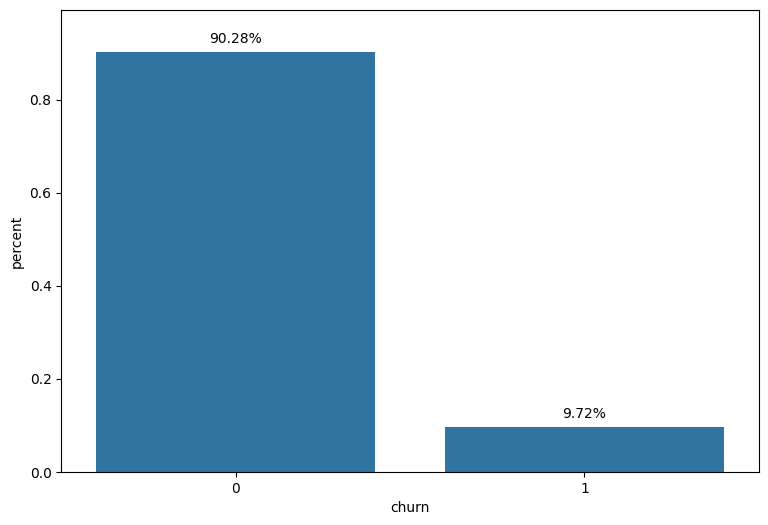

In [ ]:
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

In [ ]:
price_stat_3_month = price[price['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})
# flatten the column names
price_stat_3_month.columns = ['_'.join(x) for x in zip(price_stat_3_month.columns.get_level_values(0), price_stat_3_month.columns.get_level_values(1))]
price_stat_3_month = price_stat_3_month.reset_index()
# add churn values
price_stat_3_month = price_stat_3_month.merge(client[['id','churn']], on=['id'], how='left')
# drop ids that are not inclued in the price dataset
price_stat_3_month = price_stat_3_month.dropna(subset=['churn']).reset_index(drop=True)
# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_3_month[f'diff_Dec_mean_{attr}'] = price[price['id'].isin(price_stat_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_3_month[f'{attr}_mean']
price_stat_3_month.head(7)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.025953,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,-0.025188,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,-0.057337,-1.500000
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,-0.027846,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.025953,3.715825
5,00184e957277eeef733a7b563fdabd06,0.145093,0.145093,0.145093,44.266930,44.266930,44.266930,0.0,0.001927,0.177780
6,001987ed9dbdab4efa274a9c7233e1f4,0.118175,0.118175,0.118175,40.728885,40.728885,40.728885,0.0,0.029425,3.715825


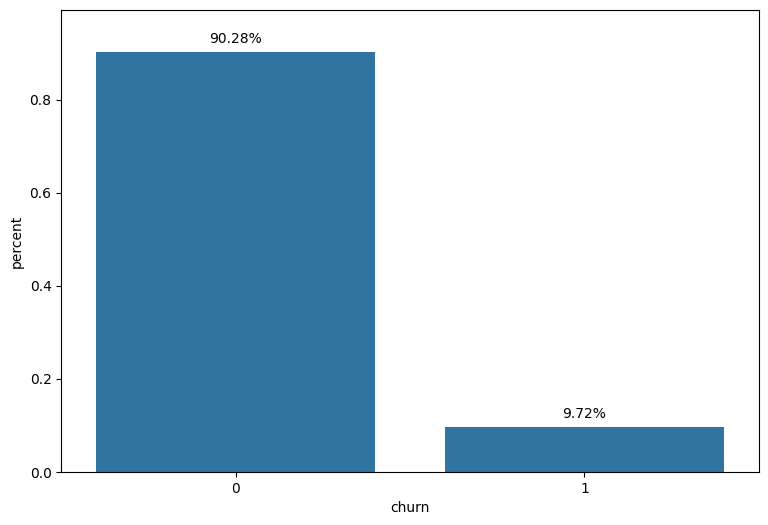

In [ ]:
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)